In [1]:
import pyarrow.parquet as pq
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.mlab as mlab
import numpy as np
import scipy
import pandas as pd

2023-08-10 19:08:44.801436: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cvmfs/sft.cern.ch/lcg/releases/MCGenerators/thepeg/2.2.3-6fa5c/x86_64-centos7-gcc11-opt/lib/ThePEG:/cvmfs/sft.cern.ch/lcg/releases/MCGenerators/herwig++/7.2.3-c1d8e/x86_64-centos7-gcc11-opt/lib/Herwig:/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/jaxlib/mlir/_mlir_libs:/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/torch/lib:/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/onnxruntime/capi/:/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/tensorflow:/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/tensorflow/contrib

In [2]:
# skim = pq.read_table("/eos/user/a/atalierc/FCC_HH_13/FCCAnalyses/run/bbyy_analysis/df_Sel_All.parquet")
# df_ = skim.to_pandas()
parquet_file = pq.ParquetFile('/eos/user/a/atalierc/FCC_HH_13/FCCAnalyses/run/bbyy_analysis/df_Sel_All_haaIncluded.parquet', memory_map=True)
df_ = parquet_file.read().to_pandas()

In [3]:
df_["label"] = 0
df_.loc[df_.process.str.contains("pwp8_pp_hh_lambda100_5f_hhbbaa"), ['label']] = 1
df_.loc[df_.process.str.contains("pwp8_pp_hh_lambda000_5f_hhbbaa"), ['label']] = 1
df_.loc[df_.process.str.contains("pwp8_pp_hh_lambda240_5f_hhbbaa"), ['label']] = 1
df_.loc[df_.process.str.contains("pwp8_pp_hh_lambda300_5f_hhbbaa"), ['label']] = 1

In [4]:
model_DNN = keras.models.load_model('model_ttH_killer_dnn')

2023-08-10 19:09:33.804645: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cvmfs/sft.cern.ch/lcg/releases/MCGenerators/thepeg/2.2.3-6fa5c/x86_64-centos7-gcc11-opt/lib/ThePEG:/cvmfs/sft.cern.ch/lcg/releases/MCGenerators/herwig++/7.2.3-c1d8e/x86_64-centos7-gcc11-opt/lib/Herwig:/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/jaxlib/mlir/_mlir_libs:/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/torch/lib:/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/onnxruntime/capi/:/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/tensorflow:/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/tensorflow/contrib/tensor_fo

In [5]:
input_vars = [  "njets",
                #"tag_b1",
                #"tag_b2",
                "pTb1_o_m_bb",
                "pTb2_o_m_bb",
                "pTbb_o_m_HH",
                "pTg1_o_m_gg",
                "pTg2_o_m_gg",
                "pTgg_o_m_HH",
                "sum_pt",
                "mindR_gb",
                "otherdR_gb",
                "GG_cosT_restHH",
                "B1_cosT_restBB",
                "G1_cosT_restGG",
                "DeltaPhi_gg",
                "DeltaEta_gg",
                "DeltaPhi_bb",
                "DeltaEta_bb",
                "DeltaPhi_HH",
                "DeltaEta_HH"
             ]

In [6]:
df_signal = df_.loc[df_.label == 1]

In [7]:
df_bkg = df_.loc[df_.label == 0]

In [8]:
df_bkg['prediction_ttH'] = model_DNN.predict(df_bkg[input_vars])

/tmp/ipykernel_2010/682329889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bkg['prediction_ttH'] = model_DNN.predict(df_bkg[input_vars])


(array([57960.65234375, 48007.25390625, 34726.21875   , 26687.50390625,
        21662.84570312, 18235.59960938, 15538.81152344, 14232.84277344,
        11340.52832031,  8828.19921875,  7271.3671875 ,  5991.22265625,
         5035.72607422,  4515.55224609,  4028.58081055,  3744.51416016,
         3279.67797852,  3231.71850586,  2873.86865234,  1789.25061035]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ],
       dtype=float32),
 [<matplotlib.patches.Polygon at 0x7fdcc810fc40>])

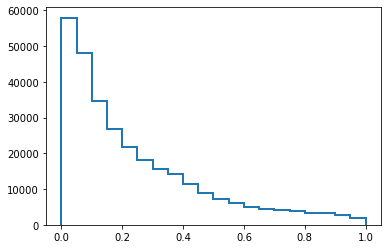

In [13]:
plt.hist(df_bkg.loc[df_bkg.process == "mgp8_pp_tth01j_5f_haa"].prediction_ttH, label='bkg', histtype=("step"), bins=20, alpha=1.0, linewidth=2, range=(0,1), weights = df_bkg.loc[df_bkg.process == "mgp8_pp_tth01j_5f_haa"].weight)

In [14]:
df_signal['prediction_ttH'] = model_DNN.predict(df_signal[input_vars])

/tmp/ipykernel_2010/671325918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_signal['prediction_ttH'] = model_DNN.predict(df_signal[input_vars])


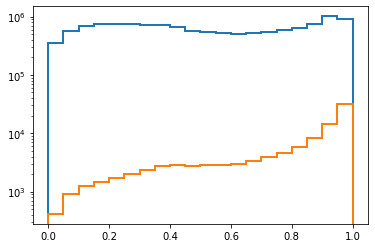

In [16]:
plt.hist(df_bkg.prediction_ttH, label='bkg', histtype=("step"), bins=20, alpha=1.0, linewidth=2, range=(0,1), weights = df_bkg.weight)
plt.hist(df_signal.prediction_ttH, label='signal', histtype=("step"), bins=20, alpha=1.0, linewidth=2, range=(0,1), weights = df_signal.weight)
plt.yscale("log")

In [17]:
EDGES = np.arange(0.,1.0,0.1)

Text(1, 1.01, '30 $ab^{-1}$ (100 TeV)')

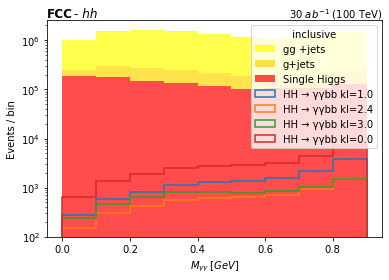

In [19]:
a = np.array(df_bkg.loc[(df_bkg.process.str.contains("jjaa")),:]['prediction_ttH'])
w_a = np.array(df_bkg.loc[(df_bkg.process.str.contains("jjaa")),:]['weight'])
b = np.array(df_bkg.loc[(df_bkg.process.str.contains("haa")) ,:]['prediction_ttH'])
w_b = np.array(df_bkg.loc[(df_bkg.process.str.contains("haa")),:]['weight'])

c = np.array(df_bkg.loc[(df_bkg.process.str.contains("jjaa")),:]['prediction_ttH'])
w_c = np.array(df_bkg.loc[(df_bkg.process.str.contains("jjaa")),:]['weight'] * 0.09)

fig, ax = plt.subplots()

plt.hist([b,c,a], weights = [w_b,w_c,w_a], label=('Single Higgs', 'g+jets', 'gg +jets'), histtype=("stepfilled"),stacked = True, color = ('red', 'gold','yellow'), alpha = 0.7, bins=EDGES);
plt.hist(df_signal.loc[(df_signal.process =='pwp8_pp_hh_lambda100_5f_hhbbaa'),:]['prediction_ttH'], 
                           weights = df_signal.loc[(df_signal.process =='pwp8_pp_hh_lambda100_5f_hhbbaa'),:]['weight'],
                           label='HH \u2192 \u03B3\u03B3bb kl=1.0', histtype=("step"), bins =EDGES, linewidth=1.5);

plt.hist(df_signal.loc[(df_signal.process =='pwp8_pp_hh_lambda240_5f_hhbbaa'),:]['prediction_ttH'], 
                           weights = df_signal.loc[(df_signal.process =='pwp8_pp_hh_lambda240_5f_hhbbaa'),:]['weight'],
                           label='HH \u2192 \u03B3\u03B3bb kl=2.4', histtype=("step"), bins =EDGES, linewidth=1.5);
plt.hist(df_signal.loc[(df_signal.process =='pwp8_pp_hh_lambda300_5f_hhbbaa'),:]['prediction_ttH'], 
                           weights = df_signal.loc[(df_signal.process =='pwp8_pp_hh_lambda300_5f_hhbbaa'),:]['weight'],
                           label='HH \u2192 \u03B3\u03B3bb kl=3.0', histtype=("step"), bins =EDGES, linewidth=1.5);

plt.hist(df_signal.loc[(df_signal.process =='pwp8_pp_hh_lambda000_5f_hhbbaa'),:]['prediction_ttH'], 
                           weights = df_signal.loc[(df_signal.process =='pwp8_pp_hh_lambda000_5f_hhbbaa') ,:]['weight'],
                           label='HH \u2192 \u03B3\u03B3bb kl=0.0', histtype=("step"), bins =EDGES, linewidth=1.5);

plt.legend(loc = 'upper right', title = ' inclusive ')
#plt.xlim(100.,180.)
#plt.ylim(1e-10,1e6)
plt.ylabel('Events / bin')
plt.xlabel('$M_{\gamma\gamma} \; [GeV]$')
plt.yscale('log')
plt.text(0.0, 1.01,'FCC', transform=ax.transAxes, fontweight = 'bold', fontsize=12)
plt.text(0.08, 1.01,'- hh', transform=ax.transAxes,fontstyle = 'italic', fontsize=12)
plt.text(1, 1.01,'30 $ab^{-1}$ (100 TeV)', transform=ax.transAxes,ha = 'right', fontsize=10)

In [20]:
model_DNN_small = keras.models.load_model('model_smaller350_dnn')
model_DNN_great = keras.models.load_model('model_greater350_dnn')

In [21]:
df_bkg['prediction_small'] = model_DNN_small.predict(df_bkg[input_vars])

/tmp/ipykernel_2010/129342411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bkg['prediction_small'] = model_DNN_small.predict(df_bkg[input_vars])


In [22]:
df_bkg['prediction_great'] = model_DNN_great.predict(df_bkg[input_vars])

/tmp/ipykernel_2010/3519867212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bkg['prediction_great'] = model_DNN_great.predict(df_bkg[input_vars])


In [23]:
df_signal['prediction_small'] = model_DNN_small.predict(df_signal[input_vars])

/tmp/ipykernel_2010/3303235730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_signal['prediction_small'] = model_DNN_small.predict(df_signal[input_vars])


In [24]:
df_signal['prediction_great'] = model_DNN_great.predict(df_signal[input_vars])

/tmp/ipykernel_2010/4282784759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_signal['prediction_great'] = model_DNN_great.predict(df_signal[input_vars])


In [26]:
df = pd.concat([df_bkg,df_signal])

In [27]:
df['Mx'] = df['hh_m'] - df['haa_m'] - df['hbb_m'] + 250

In [28]:
df_small = df.loc[df.Mx < 350]
df_great = df.loc[df.Mx >= 350]

In [30]:
df_small

,weight,a1_pt,a1_eta,a1_phi,a1_e,a2_pt,a2_eta,a2_phi,a2_e,b1_pt,...,DeltaPhi_bb,DeltaEta_bb,DeltaPhi_HH,DeltaEta_HH,process,label,prediction_ttH,prediction_small,prediction_great,Mx
5096140,3.689177,73.308945,-0.071720,-2.640812,73.497566,60.421906,0.549417,1.467708,69.773079,75.394218,...,2.997284,1.121893,0.143922,0.298008,mgp8_pp_tth01j_5f_haa,0,0.037532,0.298074,0.254483,257.476868
5096147,3.689177,119.724045,0.178350,3.111698,121.633224,34.102139,0.210552,-0.486952,34.860847,103.101257,...,1.237984,0.530799,-1.016597,0.953612,mgp8_pp_tth01j_5f_haa,0,0.241327,0.662148,0.566909,318.539307
5096150,3.689177,89.993492,-1.923856,-2.556242,314.678253,64.941017,-2.138788,1.811256,279.471771,134.841797,...,2.142788,0.844618,-1.672275,0.755966,mgp8_pp_tth01j_5f_haa,0,0.412256,0.549934,0.548669,310.384277
5096152,3.689177,83.910019,1.866585,-1.430180,277.777008,41.328766,2.890043,2.517393,372.985016,92.147408,...,2.381951,1.639094,2.924943,0.452708,mgp8_pp_tth01j_5f_haa,0,0.130275,0.170644,0.208596,276.831726
5096153,3.689177,240.667984,0.035126,-1.659873,240.816483,72.851044,-0.865594,-1.516515,101.890175,161.386063,...,0.019271,0.848365,-0.624387,0.163332,mgp8_pp_tth01j_5f_haa,0,0.555624,0.961382,0.811722,305.947052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5096123,0.012706,52.599461,-0.761571,0.786109,68.604675,47.660866,-2.859854,0.848214,417.420044,85.135048,...,2.004317,0.390789,-1.419877,0.135109,pwp8_pp_hh_lambda300_5f_hhbbaa,1,0.548352,0.875867,0.686209,276.537750
5096130,0.012706,67.971375,-2.070606,1.083764,273.779877,41.291588,-0.463329,-0.673050,45.803562,81.991547,...,-2.301028,0.135351,2.935260,0.021870,pwp8_pp_hh_lambda300_5f_hhbbaa,1,0.874023,0.817213,0.766209,283.317444
5096136,0.012706,69.829063,0.658866,-1.873920,85.541916,56.921638,0.406789,1.428593,61.696548,64.490623,...,-3.063838,0.832245,0.988250,0.457453,pwp8_pp_hh_lambda300_5f_hhbbaa,1,0.524932,0.720047,0.573077,250.928619
5096138,0.012706,77.583496,-0.473443,-2.345246,86.442230,49.090370,0.192094,1.419085,49.998878,70.665230,...,-1.050785,1.175069,-2.487214,0.283207,pwp8_pp_hh_lambda300_5f_hhbbaa,1,0.843183,0.605319,0.762542,301.492706


(array([  348.21014404,  1338.13720703,  1957.67785645,  2322.05639648,
         2576.85766602,  2636.62353516,  2755.58520508,  2939.83935547,
         3157.36816406,  3368.38110352,  3369.9074707 ,  3329.94042969,
         3461.25976562,  3750.36962891,  4209.72998047,  4822.20654297,
         5856.10351562,  7804.40576172, 12510.00585938, 27103.19726562]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ],
       dtype=float32),
 [<matplotlib.patches.Polygon at 0x7f1ec076a5e0>])

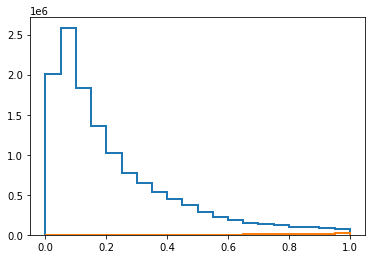

In [16]:
plt.hist(df.loc[df.label==0].prediction, label='bkg', histtype=("step"), bins=20, alpha=1.0, linewidth=2, range=(0.,1), weights = df.loc[df.label==0].weight)
plt.hist(df.loc[df.label==1].prediction, label='signal', histtype=("step"), bins=20, alpha=1.0, linewidth=2, range=(0.,1), weights = df.loc[df.label==1].weight)
#plt.yscale("log")

In [31]:
cut = 0.0

In [32]:
EDGES = [100.,118, 120, 121, 122, 123, 124, 125, 126, 127, 128,129, 130, 132, 180]

In [37]:
def drawMgg(df,EDGES,label):
    a = np.array(df.loc[(df.process.str.contains("jjaa")) ,:]['haa_m'])
    w_a = np.array(df.loc[(df.process.str.contains("jjaa")) ,:]['weight'])
    b = np.array(df.loc[(df.process.str.contains("haa")) ,:]['haa_m'])
    w_b = np.array(df.loc[(df.process.str.contains("haa")) ,:]['weight'])

    c = np.array(df.loc[(df.process.str.contains("jjaa")),:]['haa_m'])
    w_c = np.array(df.loc[(df.process.str.contains("jjaa")) ,:]['weight'] * 0.09)

    fig, ax = plt.subplots()

    plt.hist([b,c,a], weights = [w_b,w_c,w_a], label=('Single Higgs', 'g+jets', 'gg +jets'), histtype=("stepfilled"),stacked = True, color = ('red', 'gold','yellow'), alpha = 0.7, bins=EDGES);
    plt.hist(df.loc[(df.process =='pwp8_pp_hh_lambda100_5f_hhbbaa') ,:]['haa_m'], 
                               weights = df.loc[(df.process =='pwp8_pp_hh_lambda100_5f_hhbbaa') ,:]['weight'],
                               label='HH \u2192 \u03B3\u03B3bb kl=1.0', histtype=("step"), bins =EDGES, linewidth=1.5);

    plt.hist(df.loc[(df.process =='pwp8_pp_hh_lambda240_5f_hhbbaa') ,:]['haa_m'], 
                               weights = df.loc[(df.process =='pwp8_pp_hh_lambda240_5f_hhbbaa') ,:]['weight'],
                               label='HH \u2192 \u03B3\u03B3bb kl=2.4', histtype=("step"), bins =EDGES, linewidth=1.5);
    plt.hist(df.loc[(df.process =='pwp8_pp_hh_lambda300_5f_hhbbaa') ,:]['haa_m'], 
                               weights = df.loc[(df.process =='pwp8_pp_hh_lambda300_5f_hhbbaa') ,:]['weight'],
                               label='HH \u2192 \u03B3\u03B3bb kl=3.0', histtype=("step"), bins =EDGES, linewidth=1.5);

    plt.hist(df.loc[(df.process =='pwp8_pp_hh_lambda000_5f_hhbbaa') ,:]['haa_m'], 
                               weights = df.loc[(df.process =='pwp8_pp_hh_lambda000_5f_hhbbaa') ,:]['weight'],
                               label='HH \u2192 \u03B3\u03B3bb kl=0.0', histtype=("step"), bins =EDGES, linewidth=1.5);

    plt.legend(loc = 'upper right', title = label)
    plt.xlim(100.,180.)
    #plt.ylim(1e-10,1e6)
    plt.ylabel('Events / bin')
    plt.xlabel('$M_{\gamma\gamma} \; [GeV]$')
    plt.yscale('log')
    plt.text(0.0, 1.01,'FCC', transform=ax.transAxes, fontweight = 'bold', fontsize=12)
    plt.text(0.08, 1.01,'- hh', transform=ax.transAxes,fontstyle = 'italic', fontsize=12)
    plt.text(1, 1.01,'30 $ab^{-1}$ (100 TeV)', transform=ax.transAxes,ha = 'right', fontsize=10)

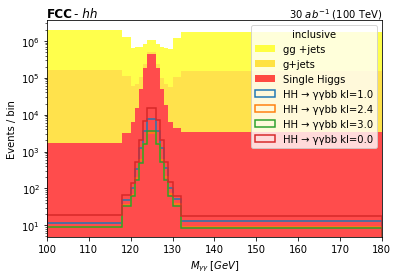

In [38]:
EDGES = [100.,118, 120, 121, 122, 123, 124, 125, 126, 127, 128,129, 130, 132, 180]
drawMgg(df,EDGES,"inclusive")

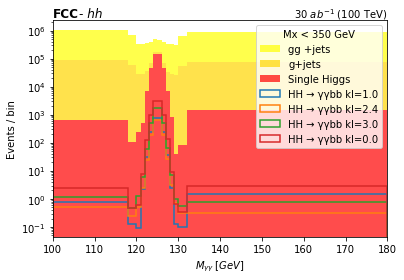

In [39]:
EDGES = [100.,118, 120, 121, 122, 123, 124, 125, 126, 127, 128,129, 130, 132, 180]
drawMgg(df_small,EDGES,"Mx < 350 GeV")

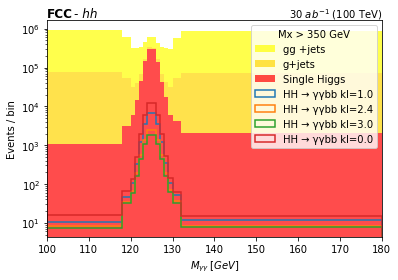

In [40]:
EDGES = [100.,118, 120, 121, 122, 123, 124, 125, 126, 127, 128,129, 130, 132, 180]
drawMgg(df_great,EDGES,"Mx > 350 GeV")

In [21]:
EDGES = np.arange(start = 80, stop = 138, step = 4)
EDGES = np.append(EDGES,200)

In [41]:
def drawMbb(df,EDGES,label):

    a = np.array(df.loc[(df.process.str.contains("jjaa")),:]['hbb_m'])
    w_a = np.array(df.loc[(df.process.str.contains("jjaa")) ,:]['weight'])
    b = np.array(df.loc[(df.process.str.contains("haa")) ,:]['hbb_m'])
    w_b = np.array(df.loc[(df.process.str.contains("haa")) ,:]['weight'])

    c = np.array(df.loc[(df.process.str.contains("jjaa")) ,:]['hbb_m'])
    w_c = np.array(df.loc[(df.process.str.contains("jjaa")) ,:]['weight'] * 0.09)

    fig, ax = plt.subplots()

    plt.hist([b,c,a], weights = [w_b,w_c,w_a], label=('Single Higgs', 'g+jets', 'gg +jets'), histtype=("stepfilled"),stacked = True, color = ('red', 'gold','yellow'), alpha = 0.7, bins=EDGES);
    plt.hist(df.loc[(df.process =='pwp8_pp_hh_lambda100_5f_hhbbaa') ,:]['hbb_m'], 
                               weights = df.loc[(df.process =='pwp8_pp_hh_lambda100_5f_hhbbaa') ,:]['weight'],
                               label='HH \u2192 \u03B3\u03B3bb kl=1.0', histtype=("step"), bins =EDGES, linewidth=1.5);

    plt.hist(df.loc[(df.process =='pwp8_pp_hh_lambda240_5f_hhbbaa') ,:]['hbb_m'], 
                               weights = df.loc[(df.process =='pwp8_pp_hh_lambda240_5f_hhbbaa') ,:]['weight'],
                               label='HH \u2192 \u03B3\u03B3bb kl=2.4', histtype=("step"), bins =EDGES, linewidth=1.5);
    plt.hist(df.loc[(df.process =='pwp8_pp_hh_lambda300_5f_hhbbaa'),:]['hbb_m'], 
                               weights = df.loc[(df.process =='pwp8_pp_hh_lambda300_5f_hhbbaa') ,:]['weight'],
                               label='HH \u2192 \u03B3\u03B3bb kl=3.0', histtype=("step"), bins =EDGES, linewidth=1.5);

    plt.hist(df.loc[(df.process =='pwp8_pp_hh_lambda000_5f_hhbbaa') ,:]['hbb_m'], 
                               weights = df.loc[(df.process =='pwp8_pp_hh_lambda000_5f_hhbbaa'),:]['weight'],
                               label='HH \u2192 \u03B3\u03B3bb kl=0.0', histtype=("step"), bins =EDGES, linewidth=1.5);

    plt.legend(loc = 'upper right', title = label)
    #plt.xlim(100.,180.)
    #plt.ylim(1e-10,1e6)
    plt.ylabel('Events / bin')
    plt.xlabel('$M_{bb} \; [GeV]$')
    plt.yscale('log')
    plt.text(0.0, 1.01,'FCC', transform=ax.transAxes, fontweight = 'bold', fontsize=12)
    plt.text(0.08, 1.01,'- hh', transform=ax.transAxes,fontstyle = 'italic', fontsize=12)
    plt.text(1, 1.01,'30 $ab^{-1}$ (100 TeV)', transform=ax.transAxes,ha = 'right', fontsize=10)

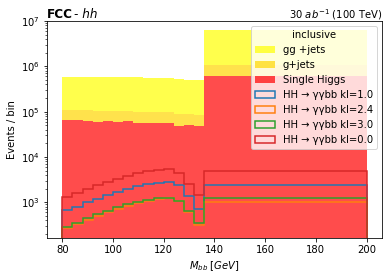

In [42]:
EDGES = np.arange(start = 80, stop = 138, step = 4)
EDGES = np.append(EDGES,200)
drawMbb(df,EDGES,"inclusive")

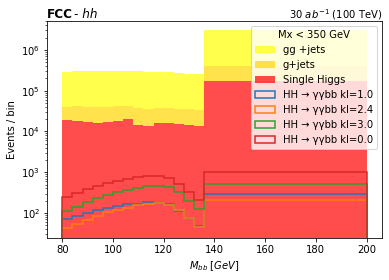

In [44]:
EDGES = np.arange(start = 80, stop = 138, step = 4)
EDGES = np.append(EDGES,200)
drawMbb(df_small,EDGES,"Mx < 350 GeV")

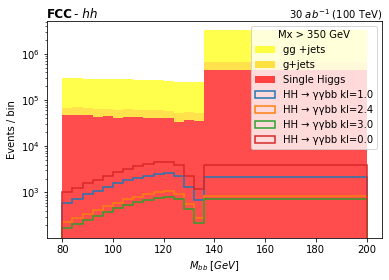

In [45]:
EDGES = np.arange(start = 80, stop = 138, step = 4)
EDGES = np.append(EDGES,200)
drawMbb(df_great,EDGES,"Mx > 350 GeV")

In [24]:
#find best cuts and categories delimiter

In [66]:
x_1 = [i*0.1 for i in range(4,7)]
x_2 = [i*0.1 for i in range(7,10)]
ttHcut = [i*0.1 for i in range(2,6)]
print(x_1)
print(x_2)
print(ttHcut)

[0.4, 0.5, 0.6000000000000001]
[0.7000000000000001, 0.8, 0.9]
[0.2, 0.30000000000000004, 0.4, 0.5]


In [51]:
mix = [(x, y) for x in x_1 for y in x_2 if x < y]
print(mix)

[(0.4, 0.7000000000000001), (0.4, 0.8), (0.4, 0.9), (0.5, 0.7000000000000001), (0.5, 0.8), (0.5, 0.9), (0.6000000000000001, 0.7000000000000001), (0.6000000000000001, 0.8), (0.6000000000000001, 0.9)]


In [52]:
EDGES = [100.,118, 120, 121, 122, 123, 124, 125, 126, 127, 128,129, 130, 132, 180]

In [53]:
def findx1x2(df,ttHcut,x_1,x_2,varT= "prediction_ttH",var = "prediction"):
    import math
    max_sig = 0.
    x_1_max = 0.
    x_2_max = 0.
    ttHcut_max = 0.
    mix = [(x, y) for x in x_1 for y in x_2 if x < y]
    print(mix)
    #medium purity region: x_1<x<x_2
    #high purity region:  x>x_2
    for cut in ttHcut:
        print("ttH cut: ", cut)
        
        for (low,up) in mix:
            print("----------------")
            print("----------------")
            print((low,up))
            bkg_medium = 0
            bkg_high = 0
            bkg_medium_unw = 0
            bkg_high_unw = 0
            signal_medium = 0
            signal_high = 0
            sig_medium = 0
            sig_high = 0
            exited = False
            for item in df.loc[df.label==0,:].process.unique():
                    (n_m, bins_m, _) = plt.hist(df.loc[(df.process == item) & (df[varT] >= cut) & (df[var] <= up) & (df[var] >low)]['haa_m'],
                                       histtype=("step"), bins=EDGES)
                    (n_h, bins_h, _) = plt.hist(df.loc[(df.process == item) & (df[varT] >= cut) & (df[var] > up)]['haa_m'],
                                       histtype=("step"), bins=EDGES)
                    if "haa"in item:
                        bkg_medium_unw += n_m
                        bkg_high_unw += n_h

                    print(item)
                    print(n_m)
                    print(n_h)

                    if "jjaa" in item:
                        if any([x < 10. for x in n_m ]) or any([x < 10. for x in n_h ]):
                            exited = True
                            break

                    (n_m, bins_m, _) = plt.hist(df.loc[(df.process == item) & (df[varT] >= cut) & (df[var] <= up) & (df[var] >low)]['haa_m'], 
                                       weights = df.loc[(df.process == item) & (df[varT] >= cut) & (df[var] <= up) & (df[var] >low) ]['weight'],
                                       histtype=("step"), bins=EDGES)
                    (n_h, bins_h, _) = plt.hist(df.loc[(df.process == item) & (df[varT] >= cut) & (df[var] > up)]['haa_m'], 
                                       weights = df.loc[(df.process == item) & (df[varT] >= cut) & (df[var] > up)]['weight'],
                                       histtype=("step"), bins=EDGES)

                    #print("n_m",n_m)
                    #print("n_h",n_h)
                    bkg_medium +=n_m
                    bkg_high +=n_h
                    print("bkg med : ", bkg_medium)
                    print("bkg high : ", bkg_high)

            ##add a+jj
            (n_m, bins_m, _) = plt.hist(df.loc[(df.process == "mgp8_pp_jjaa_5f") & (df[varT] >= cut) & (df[var] <= up) & (df[var] >low)]['haa_m'], 
                                       weights = df.loc[(df.process == "mgp8_pp_jjaa_5f") & (df[varT] >= cut) & (df[var] <= up) & (df[var] >low) ]['weight']*0.09,
                                       histtype=("step"), bins=EDGES)
            (n_h, bins_h, _) = plt.hist(df.loc[(df.process == "mgp8_pp_jjaa_5f") & (df[varT] >= cut) & (df[var] > up)]['haa_m'], 
                                       weights = df.loc[(df.process == "mgp8_pp_jjaa_5f") & (df[varT] >= cut) & (df[var] > up)]['weight']*0.09,
                                       histtype=("step"), bins=EDGES)
            bkg_medium +=n_m
            bkg_high +=n_h
            print("add a+jj")
            print("bkg med : ", bkg_medium)
            print("bkg high : ", bkg_high)

            (signal_medium, bins_m, _) = plt.hist(df.loc[(df.process == "pwp8_pp_hh_lambda100_5f_hhbbaa") & (df[varT] >= cut) & (df[var] <= up) & (df[var] >low)]['haa_m'], 
                                   histtype=("step"), bins=EDGES)
            (signal_high, bins_h, _) = plt.hist(df.loc[(df.process == "pwp8_pp_hh_lambda100_5f_hhbbaa") & (df[varT] >= cut) & (df[var] > up) ]['haa_m'], 
                                   histtype=("step"), bins=EDGES)

            if any([x < 10. for x in signal_medium ]) or any([x < 10. for x in signal_high ]) or any([x < 10. for x in bkg_high_unw ]) or any([x < 10. for x in bkg_medium_unw ]):
                    exited = True
                    continue

            (signal_medium, bins_m, _) = plt.hist(df.loc[(df.process == "pwp8_pp_hh_lambda100_5f_hhbbaa") & (df[varT] >= cut) & (df[var] <= up) & (df[var] >low)]['haa_m'], 
                                   weights = df.loc[(df.process == "pwp8_pp_hh_lambda100_5f_hhbbaa") & (df[varT] >= cut) & (df[var] <= up) & (df[var] >low) ]['weight'],
                                   histtype=("step"), bins=EDGES)
            (signal_high, bins_h, _) = plt.hist(df.loc[(df.process == "pwp8_pp_hh_lambda100_5f_hhbbaa") & (df[varT] >= cut) & (df[var] > up) ]['haa_m'], 
                                   weights = df.loc[(df.process == "pwp8_pp_hh_lambda100_5f_hhbbaa") & (df[varT] >= cut) & (df[var] > up) ]['weight'],
                                   histtype=("step"), bins=EDGES)

            print("sig med : ",signal_medium)
            print("sig high : ",signal_high)

            if not exited:

                    print("sono dentro")
                    try:
                        for i in range(0,len(bins_m)-1):
                            print(signal_medium[i])
                            print(bkg_medium[i])
                            sig_medium += math.sqrt(abs(2*((signal_medium[i]+bkg_medium[i])*math.log(1+signal_medium[i]/bkg_medium[i])-signal_medium[i])))
                            print("sono dentro")
                            sig_high += math.sqrt(abs(2*((signal_high[i]+bkg_high[i])*math.log(1+signal_high[i]/bkg_high[i])-signal_high[i])))

                        print(":::::::")
                        print("Exact significance")
                        print("sig_med",sig_medium)
                        print("sig_high",sig_high)
                        print("Naive")
                        print("sig_med",np.sum(signal_medium)/math.sqrt(np.sum(bkg_medium)))
                        print("sig_high",np.sum(signal_high)/math.sqrt(np.sum(bkg_high)))
                        #sig_medium = signal_medium/math.sqrt(bkg_medium)
                        #sig_high = signal_high/math.sqrt(bkg_high)
                        sig_tot = math.sqrt(sig_medium**2+sig_high**2)
                        if sig_tot > max_sig: #and sum(signal_medium) > 1.0 and sum(signal_high) > 1.0: 
                            max_sig = sig_tot
                            x_1_max = low
                            x_2_max = up
                            ttHcut_max = cut
                    except:
                        print("error "+str(ValueError))
    print("ttH cut: ",ttHcut_max)
    print("x_1: ",x_1_max)
    print("x_2: ",x_2_max)
    print("Significance: ",max_sig)
    return ttHcut_max, x_1_max, x_2_max, max_sig

In [54]:
def findm1m2(df,x_1,x_2,var = "hbb_m"):
    import math
    max_sig = 0.
    x_1_max = 0.
    x_2_max = 0.
    mix = [(x, y) for x in x_1 for y in x_2 if x < y]
    print(mix)
    #medium purity region: x_1<x<x_2
    #high purity region:  x>x_2
    for (low,up) in mix:
        print("----------------")
        print("----------------")
        print((low,up))
        bkg_medium = 0
        bkg_high = 0
        bkg_medium_unw = 0
        bkg_high_unw = 0
        signal_medium = 0
        signal_high = 0
        sig_medium = 0
        sig_high = 0
        exited = False
        for item in df.loc[df.label==0,:].process.unique():
                (n_m, bins_m, _) = plt.hist(df.loc[(df.process == item) & ((df[var] > up) | (df[var] <=low))]['haa_m'],
                                   histtype=("step"), bins=EDGES)
                (n_h, bins_h, _) = plt.hist(df.loc[(df.process == item) & (df[var] <= up) & (df[var] > low)]['haa_m'],
                                   histtype=("step"), bins=EDGES)
                if "haa"in item:
                    bkg_medium_unw += n_m
                    bkg_high_unw += n_h
                    
                print(item)
                print(n_m)
                print(n_h)
                
                if "jjaa" in item:
                    if any([x < 10. for x in n_m ]) or any([x < 10. for x in n_h ]):
                        exited = True
                        break

                (n_m, bins_m, _) = plt.hist(df.loc[(df.process == item) & ((df[var] > up) | (df[var] <=low))]['haa_m'], 
                                   weights = df.loc[(df.process == item) & ((df[var] > up) | (df[var] <=low)) ]['weight'],
                                   histtype=("step"), bins=EDGES)
                (n_h, bins_h, _) = plt.hist(df.loc[(df.process == item) & (df[var] <= up) & (df[var] > low)]['haa_m'], 
                                   weights = df.loc[(df.process == item) & (df[var] <= up) & (df[var] > low)]['weight'],
                                   histtype=("step"), bins=EDGES)
            
                #print("n_m",n_m)
                #print("n_h",n_h)
                bkg_medium +=n_m
                bkg_high +=n_h
                print("bkg med : ", bkg_medium)
                print("bkg high : ", bkg_high)
        
        ##add a+jj
        (n_m, bins_m, _) = plt.hist(df.loc[(df.process == "mgp8_pp_jjaa_5f") & ((df[var] > up) | (df[var] <=low))]['haa_m'], 
                                   weights = df.loc[(df.process == "mgp8_pp_jjaa_5f") & ((df[var] > up) | (df[var] <=low)) ]['weight']*0.09,
                                   histtype=("step"), bins=EDGES)
        (n_h, bins_h, _) = plt.hist(df.loc[(df.process == "mgp8_pp_jjaa_5f") & (df[var] <= up) & (df[var] > low)]['haa_m'], 
                                   weights = df.loc[(df.process == "mgp8_pp_jjaa_5f") & (df[var] <= up) & (df[var] > low)]['weight']*0.09,
                                   histtype=("step"), bins=EDGES)
        bkg_medium +=n_m
        bkg_high +=n_h
        print("add a+jj")
        print("bkg med : ", bkg_medium)
        print("bkg high : ", bkg_high)
        
        (signal_medium, bins_m, _) = plt.hist(df.loc[(df.process == "pwp8_pp_hh_lambda100_5f_hhbbaa")& ((df[var] > up) | (df[var] <=low))]['haa_m'], 
                               histtype=("step"), bins=EDGES)
        (signal_high, bins_h, _) = plt.hist(df.loc[(df.process == "pwp8_pp_hh_lambda100_5f_hhbbaa") & (df[var] <= up) & (df[var] > low) ]['haa_m'], 
                               histtype=("step"), bins=EDGES)
        
        if any([x < 10. for x in signal_medium ]) or any([x < 10. for x in signal_high ]) or any([x < 10. for x in bkg_high_unw ]) or any([x < 10. for x in bkg_medium_unw ]):
                exited = True
                continue
        
        (signal_medium, bins_m, _) = plt.hist(df.loc[(df.process == "pwp8_pp_hh_lambda100_5f_hhbbaa") & ((df[var] > up) | (df[var] <=low))]['haa_m'], 
                               weights = df.loc[(df.process == "pwp8_pp_hh_lambda100_5f_hhbbaa") & ((df[var] > up) | (df[var] <=low)) ]['weight'],
                               histtype=("step"), bins=EDGES)
        (signal_high, bins_h, _) = plt.hist(df.loc[(df.process == "pwp8_pp_hh_lambda100_5f_hhbbaa") & (df[var] <= up) & (df[var] > low) ]['haa_m'], 
                               weights = df.loc[(df.process == "pwp8_pp_hh_lambda100_5f_hhbbaa") & (df[var] <= up) & (df[var] > low)]['weight'],
                               histtype=("step"), bins=EDGES)
        
        print("sig med : ",signal_medium)
        print("sig high : ",signal_high)
        
        if not exited:
            
                print("sono dentro")
                try:
                    for i in range(0,len(bins_m)-1):
                        print(signal_medium[i])
                        print(bkg_medium[i])
                        sig_medium += math.sqrt(abs(2*((signal_medium[i]+bkg_medium[i])*math.log(1+signal_medium[i]/bkg_medium[i])-signal_medium[i])))
                        print("sono dentro")
                        sig_high += math.sqrt(abs(2*((signal_high[i]+bkg_high[i])*math.log(1+signal_high[i]/bkg_high[i])-signal_high[i])))
                    
                    print(":::::::")
                    print("Exact significance")
                    print("sig_med",sig_medium)
                    print("sig_high",sig_high)
                    print("Naive")
                    print("sig_med",np.sum(signal_medium)/math.sqrt(np.sum(bkg_medium)))
                    print("sig_high",np.sum(signal_high)/math.sqrt(np.sum(bkg_high)))
                    #sig_medium = signal_medium/math.sqrt(bkg_medium)
                    #sig_high = signal_high/math.sqrt(bkg_high)
                    sig_tot = math.sqrt(sig_medium**2+sig_high**2)
                    if sig_tot > max_sig: #and sum(signal_medium) > 1.0 and sum(signal_high) > 1.0: 
                        max_sig = sig_tot
                        x_1_max = low
                        x_2_max = up
                except:
                    print("error "+str(ValueError))
        
    print("x_1: ",x_1_max)
    print("x_2: ",x_2_max)
    print("Significance: ",max_sig)
    return x_1_max, x_2_max, max_sig

In [63]:
###smaller than 350 GeV

[(0.4, 0.7000000000000001), (0.4, 0.8), (0.4, 0.9), (0.5, 0.7000000000000001), (0.5, 0.8), (0.5, 0.9), (0.6000000000000001, 0.7000000000000001), (0.6000000000000001, 0.8), (0.6000000000000001, 0.9)]
ttH cut:  0.2
----------------
----------------
(0.4, 0.7000000000000001)
mgp8_pp_tth01j_5f_haa
[  13.   51.  172.  382.  710. 1046. 1135.  758.  446.  172.   84.   31.]
[ 30.  82. 191. 373. 648. 852. 811. 653. 381. 183.  72.  48.]
bkg med :  [  47.95932007  188.14808655  634.53515625 1409.27636719 2619.28076172
 3858.74072266 4187.52929688 2796.60546875 1645.49609375  634.5859375
  309.9140625   114.37304688]
bkg high :  [ 110.675354    302.51257324  704.63061523 1376.07495117 2390.5480957
 3142.99804688 2992.13867188 2409.21289062 1405.68164062  675.16992188
  265.640625    177.09375   ]
mgp8_pp_h012j_5f_haa
[ 0.  7.  8. 34. 65. 83. 74. 68. 37. 11.  5.  0.]
[ 3.  2.  8. 13. 27. 37. 55. 20. 15.  4.  7.  2.]
bkg med :  [   47.95932007  1241.2794342   1838.11401367  6524.48339844
 12398.3530

mgp8_pp_tth01j_5f_haa
[  38.  116.  329.  701. 1295. 1820. 1853. 1326.  764.  334.  140.   67.]
[ 5. 17. 34. 54. 63. 78. 93. 85. 63. 21. 16. 12.]
bkg med :  [ 140.18876648  427.94314575 1213.74438477 2586.10864258 4777.35302734
 6714.8046875  6836.55664062 4892.21484375 2818.7421875  1232.27734375
  516.5234375   247.19335938]
bkg high :  [ 18.44589233  62.71603394 125.43206787 199.21562195 232.41687012
 287.75354004 343.09552002 313.58276367 232.42016602  77.47338867
  59.02734375  44.27050781]
mgp8_pp_h012j_5f_haa
[  3.   9.  16.  46.  91. 120. 127.  87.  51.  14.  12.   2.]
[0. 0. 0. 1. 1. 0. 2. 1. 1. 1. 0. 0.]
bkg med :  [  591.5308075   1781.96939087  3620.90112305  9506.68334961
 18468.05419922 24768.609375   25943.60742188 17981.05078125
 10491.453125    3338.51171875  2321.8671875    548.08398438]
bkg high :  [ 18.44589233  62.71603394 125.43206787 349.66296387 382.86421204
 287.75354004 643.99020386 464.03009033 382.86749268 227.92071533
  59.02734375  44.27050781]
mgp8_pp_jja

add a+jj
bkg med :  [39660.28935051 43180.34706879 40937.71746826 47479.47164917
 52263.47009277 58215.42541504 59659.47998047 52505.04052734
 48882.99755859 40583.64746094 39005.37988281 39282.35253906]
bkg high :  [5031.95012188 5589.93472481 4972.53817368 6693.00743866 7110.02090454
 8264.00274658 9590.46246338 6529.37634277 6204.06231689 5729.57702637
 5663.02685547 4940.54870605]
sig med :  [  2.20270729  10.56837273  31.33181763  75.10569763 137.87480164
 197.93716431 197.34576416 140.19940186  76.91235352  32.58154297
  11.80957031   2.90484619]
sig high :  [  2.20270729   8.56234074  22.56506348  48.39634323  85.97338104
 117.18635559 119.70202637  89.54031372  48.97149658  25.67944336
   9.1295166    2.90484619]
sono dentro
2.202707290649414
39660.28935050964
sono dentro
10.56837272644043
43180.34706878662
sono dentro
31.331817626953125
40937.71746826172
sono dentro
75.10569763183594
47479.47164916992
sono dentro
137.8748016357422
52263.47009277344
sono dentro
197.937164306640

bkg med :  [22268.58132553 25819.03645325 24116.99119568 28376.16030884
 31949.47570801 35616.76098633 36414.01025391 31193.09912109
 28556.52978516 22611.63549805 22682.45776367 23449.06860352]
bkg high :  [4635.23918438 5172.804842   4640.0010643  6305.04747772 6733.72891235
 7884.79376221 9222.92193604 6193.92224121 5854.02325439 5338.70007324
 5260.48193359 4543.83776855]
add a+jj
bkg med :  [24236.89187241 28112.44465637 26089.53807068 30468.34390259
 33927.85852051 37633.07739258 38494.52197266 33165.64599609
 30642.87744141 24543.33081055 24634.57885742 25514.99047852]
bkg high :  [5031.95012188 5589.93472481 4972.53817368 6693.00743866 7110.02090454
 8264.00274658 9590.46246338 6529.37634277 6204.06231689 5729.57702637
 5663.02685547 4940.54870605]
sig med :  [  1.91539776   8.30181885  25.41506004  58.72939682 108.73171997
 154.36450195 156.13525391 111.15039062  61.26904297  25.81311035
   9.95812988   2.36218262]
sig high :  [  2.20270729   8.56234074  22.56506348  48.396343

bkg med :  [  209.47419739   764.11320496  2406.7010498   7147.59765625
 14247.19921875 17892.95507812 18356.81640625 13242.375
  7820.46289062  2274.7265625   1160.93359375   396.81640625]
bkg high :  [ 198.40666199  448.46185303  416.06817627 1628.63970947 1777.02636719
 2500.55908203 4112.01904297 1891.32885742 1507.67431641  761.21484375
  716.14697266  106.97998047]
mgp8_pp_jjaa_5f
[1510. 1592. 1496. 1534. 1444. 1463. 1506. 1456. 1506. 1465. 1450. 1466.]
[126. 134. 113. 126. 122. 121. 120. 112. 112. 128. 128. 122.]
bkg med :  [49190.09919739 52404.61320496 50933.2010498  56906.72265625
 61086.94921875 65349.01757812 67177.50390625 60380.375
 56577.21289062 49704.1015625  48104.68359375 47858.56640625]
bkg high :  [4282.09416199 4791.94622803 4078.85723877 5712.81158447 5731.54199219
 6422.66064453 8001.70654297 5521.70385742 5138.04931641 4910.21484375
 4865.14697266 4061.49560547]
mgp8_pp_vh012j_5f_haa
[  3.  21.  63. 179. 346. 496. 504. 332. 172.  70.  23.  14.]
[ 3.  6. 17. 26.

bkg med :  [  194.71748352   298.01448059  2149.26916504  5373.809021
 10277.84008789 14062.15942383 13324.88769531 10351.86914062
  6178.65429688  1690.6015625    786.26953125   378.37695312]
bkg high :  [ 198.40666199  448.46185303  416.06817627 1628.63970947 1777.02636719
 2500.55908203 4112.01904297 1891.32885742 1507.67431641  761.21484375
  716.14697266  106.97998047]
mgp8_pp_jjaa_5f
[1027. 1104. 1002. 1058.  998.  996. 1045. 1005. 1066.  998.  995. 1019.]
[126. 134. 113. 126. 122. 121. 120. 112. 112. 128. 128. 122.]
bkg med :  [33484.56123352 36109.01448059 34651.64416504 39692.684021
 42650.46508789 46369.90942383 47222.07519531 42951.55664062
 40757.02929688 34063.2265625  33061.58203125 33432.18945312]
bkg high :  [4282.09416199 4791.94622803 4078.85723877 5712.81158447 5731.54199219
 6422.66064453 8001.70654297 5521.70385742 5138.04931641 4910.21484375
 4865.14697266 4061.49560547]
mgp8_pp_vh012j_5f_haa
[  3.  17.  45. 132. 250. 327. 363. 237. 122.  45.  13.  11.]
[ 3.  6. 1

bkg med :  [ 191.02830505  114.36453247 1730.32183838 3864.0244751  7534.15600586
 9019.68164062 9177.42041016 6811.37646484 4011.66210938  545.22070312
  716.16992188  348.86132812]
bkg high :  [ 198.40666199  448.46185303  416.06817627 1628.63970947 1777.02636719
 2500.55908203 4112.01904297 1891.32885742 1507.67431641  761.21484375
  716.14697266  106.97998047]
mgp8_pp_jjaa_5f
[630. 733. 625. 674. 623. 641. 652. 635. 667. 618. 627. 660.]
[126. 134. 113. 126. 122. 121. 120. 112. 112. 128. 128. 122.]
bkg med :  [20606.96580505 23868.14578247 21984.22808838 25705.8369751
 27723.24975586 29792.08789062 30306.29541016 27389.34521484
 25626.63085938 20575.25195312 21054.48242188 21757.61132812]
bkg high :  [4282.09416199 4791.94622803 4078.85723877 5712.81158447 5731.54199219
 6422.66064453 8001.70654297 5521.70385742 5138.04931641 4910.21484375
 4865.14697266 4061.49560547]
mgp8_pp_vh012j_5f_haa
[  3.  15.  35.  93. 176. 209. 231. 157.  75.  30.   8.   6.]
[ 3.  6. 17. 26. 44. 55. 55. 53

bkg med :  [  172.58241272   694.01882935  1715.56561279  5655.44396973
 12425.94140625 15016.22729492 14943.31005859 11142.15185547
  6132.74414062  1877.12695312   914.58203125   205.79101562]
bkg high :  [ 172.58240891  400.50253296  353.35212708 1260.53286743 1533.53344727
 2036.52905273 3321.27001953 1386.78027344 1132.22485352  503.80102539
  668.1953125    66.40332031]
mgp8_pp_jjaa_5f
[1341. 1401. 1324. 1349. 1293. 1296. 1328. 1288. 1334. 1289. 1299. 1300.]
[112. 124. 102. 114. 111. 113. 111. 103. 101. 117. 112. 113.]
bkg med :  [43671.26991272 46138.95632935 44662.81561279 49413.63146973
 54367.62890625 57055.22729492 58020.31005859 52921.65185547
 49404.36914062 43648.62695312 42969.70703125 42293.29101562]
bkg high :  [3802.51990891 4419.36190796 3659.37556458 4955.73599243 5131.49438477
 5699.31811523 6919.23095703 4725.42871094 4406.04516602 4296.24633789
 4298.5703125  3729.19238281]
mgp8_pp_vh012j_5f_haa
[  1.  18.  53. 153. 289. 425. 434. 293. 145.  60.  20.   9.]
[ 2.  

bkg med :  [30180.44658947 31590.2237854  30623.01901245 34795.62097168
 38630.84326172 41697.64123535 41600.05297852 38278.98779297
 36164.63183594 30337.97460938 29572.796875   29707.3359375 ]
bkg high :  [3809.25162029 4432.82533169 3706.49754333 5036.51648712 5266.12867737
 5870.97619629 7094.25491333 4890.35510254 4517.11804199 4343.36816406
 4315.39953613 3739.28991699]
mgp8_pp_vbf_h01j_5f_haa
[ 3.  5. 12. 23. 35. 65. 61. 45. 25. 13.  1.  3.]
[ 0.  1.  1.  3.  4.  9. 11.  4.  6.  4.  0.  0.]
bkg med :  [30254.44695568 31713.55775452 30919.02041626 35362.95751953
 39494.17944336 43300.97998047 43104.73364258 39389.00244141
 36781.30664062 30658.64550781 29597.46386719 29781.33691406]
bkg high :  [3809.25162029 4457.4921217  3731.16433334 5110.51686096 5364.79585266
 6092.97723389 7365.58972168 4989.02233887 4665.11889648 4442.03533936
 4315.39953613 3739.28991699]
add a+jj
bkg med :  [32956.48601818 34532.31556702 33527.68447876 38059.16064453
 42114.51538086 45880.46435547 45763.

add a+jj
bkg med :  [20083.36142635 23312.86733246 21267.04315186 25059.78308105
 27296.49490356 29970.00708008 29459.49951172 26935.08691406
 24827.6328125  20212.40356445 20428.51708984 21250.00976562]
bkg high :  [4135.95474529 4819.19915295 4028.69753647 5443.05397034 5688.58198547
 6422.59735107 7689.37585449 5289.47253418 4959.73510742 4783.32293701
 4642.10266113 4068.91003418]
----------------
----------------
(0.6000000000000001, 0.9)
mgp8_pp_tth01j_5f_haa
[ 10.  33. 106. 210. 411. 511. 514. 411. 205. 107.  27.  19.]
[ 1. 10. 18. 23. 32. 27. 45. 43. 31. 12.  8.  7.]
bkg med :  [  36.89178467  121.7428894   391.05224609  774.72680664 1516.26489258
 1885.14111328 1896.12792969 1516.16455078  756.33642578  394.77148438
   99.61523438   70.09960938]
bkg high :  [  3.68917656  36.89177704  66.4052124   84.85110474 118.05369568
  99.6078186  166.01242065 158.63336182 114.36358643  44.26977539
  29.51318359  25.82403564]
mgp8_pp_h012j_5f_haa
[ 2.  2.  8. 23. 40. 53. 56. 35. 21.  2.  

bkg med :  [  323.02975464   730.91055298  1825.43182373  5544.76757812
 11639.69189453 13704.08862305 15256.55371094  9607.22167969
  6249.12158203  1686.09375     1310.58789062   202.1015625 ]
bkg high :  [  3.68917656  25.82423782  29.51342773 205.78501892 235.29844666
  84.85108948 418.94839478  92.22946167 216.85211182 176.2713623
  14.7565918    7.3782959 ]
mgp8_pp_jjaa_5f
[1273. 1328. 1250. 1309. 1234. 1246. 1258. 1238. 1257. 1217. 1217. 1233.]
[ 7.  8.  9.  7. 10.  4.  4.  5.  9.  8.  9. 11.]
add a+jj
bkg med :  [ 4037.60397339  4605.97305298  5471.54119873  9359.27539062
 15235.64501953 17335.01049805 18922.44433594 13214.83105469
  9912.09814453  5232.5078125   4857.00195312  3795.140625  ]
bkg high :  [ 24.10790825  49.15993118  55.76608276 226.20375061 264.46806335
  96.51893616 430.61624146 106.81427002 243.10488892 199.6072998
  41.00952148  39.46520996]
----------------
----------------
(0.5, 0.7000000000000001)
mgp8_pp_tth01j_5f_haa
[  1.  13.  24.  65. 125. 161. 201. 1

mgp8_pp_tth01j_5f_haa
[  1.   6.  15.  34.  74.  70. 117.  86.  30.  15.   4.   2.]
[  5.  27.  61. 122. 229. 294. 258. 229. 111.  61.  14.  11.]
bkg med :  [  3.68917656  22.13506317  55.337677   125.43206787 272.99920654
 258.24053955 431.63293457 317.27197266 110.67626953  55.33813477
  14.75683594   7.37841797]
bkg high :  [  18.44589233   99.6078186   225.03987122  450.07720947  844.82556152
 1084.62744141  951.81591797  844.79882812  409.47509766  225.02685547
   51.64550781   40.57861328]
mgp8_pp_h012j_5f_haa
[ 0.  0.  3.  9. 13. 20. 10. 14. 10.  0.  1.  0.]
[ 2.  1.  5. 12. 24. 25. 41. 13. 12.  3.  5.  1.]
bkg med :  [   3.68917656   22.13506317  506.67971802 1479.45831299 2228.81378174
 3267.18609619 1936.1060791  2423.53369141 1615.14892578   55.33813477
  165.20410156    7.37841797]
bkg high :  [ 319.34057617  250.05517578  977.27656555 2255.44500732 4455.56018066
 4845.80957031 7120.15380859 2800.61328125 2214.84228516  676.36865234
  803.88183594  191.02587891]
mgp8_pp_jja

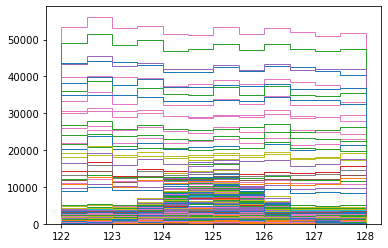

In [65]:
EDGES = [122, 122.5, 123, 123.5, 124,124.5, 125, 125.5, 126, 126.5, 127, 127.5, 128]
small_ttHc, small_x1, small_x2, small_max_sig = findx1x2(df_small,ttHcut,x_1,x_2,varT= "prediction_ttH",var = "prediction_small")

[(0.4, 0.7000000000000001), (0.4, 0.8), (0.4, 0.9), (0.5, 0.7000000000000001), (0.5, 0.8), (0.5, 0.9), (0.6000000000000001, 0.7000000000000001), (0.6000000000000001, 0.8), (0.6000000000000001, 0.9)]
ttH cut:  0.2
----------------
----------------
(0.4, 0.7000000000000001)
mgp8_pp_tth01j_5f_haa
[ 149.  281.  468.  866. 1105. 1405. 1406. 1156.  790.  472.  293.  172.]
[ 180.  357.  492.  801.  990. 1266. 1206. 1019.  762.  487.  344.  181.]
bkg med :  [ 549.69116211 1036.66772461 1726.5378418  3194.64355469 4076.75
 5183.68164062 5187.37109375 4265.0078125  2914.66796875 1741.421875
 1081.00976562  634.5859375 ]
bkg high :  [ 664.05761719 1317.04760742 1815.02050781 2954.86083984 3652.54785156
 4670.84765625 4449.48046875 3759.55273438 2811.36328125 1796.76367188
 1269.171875    667.79101562]
mgp8_pp_h012j_5f_haa
[ 17.  30.  38.  71. 110. 125. 128.  99.  64.  32.  14.  13.]
[10. 24. 28. 61. 69. 86. 68. 76. 42. 30. 17. 13.]
bkg med :  [ 3107.29492188  5550.08618164  7443.53393555 13876.39

mgp8_pp_tth01j_5f_haa
[ 311.  607.  922. 1622. 2043. 2608. 2565. 2144. 1509.  933.  616.  339.]
[18. 31. 38. 45. 52. 63. 47. 31. 43. 26. 21. 14.]
bkg med :  [1147.34399414 2239.26074219 3401.31152344 5984.29296875 7537.55273438
 9622.09375    9458.84960938 7906.         5564.4375     3440.4375
 2271.5        1250.0625    ]
bkg high :  [ 66.4052124  114.36453247 140.18814087 166.01165771 191.83569336
 232.41894531 173.39282227 114.36547852 158.63598633  95.91943359
  77.47338867  51.64892578]
mgp8_pp_h012j_5f_haa
[ 27.  51.  63. 128. 173. 207. 194. 173. 104.  61.  29.  25.]
[0. 3. 3. 4. 6. 4. 2. 2. 2. 1. 2. 1.]
bkg med :  [ 5209.4206543   9912.07128906 12879.48925781 25241.72460938
 33565.08398438 40764.2734375  38645.33398438 33934.390625
 21211.5625     12618.078125    6634.640625    5011.390625  ]
bkg high :  [  66.4052124   565.70651245  591.53030396  767.80108643 1094.51928711
  834.20800781  474.28735352  415.26025391  459.53051758  246.36669922
  378.36791992  202.09619141]
mgp8_

bkg med :  [20869.05029297 26068.64704895 28312.83572388 37355.49694824
 43618.97998047 49545.02807617 47619.70776367 46080.04394531
 34993.71777344 27054.63867188 23830.42138672 22293.7109375 ]
bkg high :  [ 4615.22399902  6022.92990112  6784.86456299  9274.31906128
  8984.66308594 11624.32055664  9590.85229492 10215.38586426
  8299.30859375  6803.52319336  4769.30761719  5496.29760742]
add a+jj
bkg med :  [22461.19482422 27789.0962677  29957.46853638 38979.71765137
 45278.19287109 51275.15112305 49215.83666992 47938.79003906
 36680.30371094 28627.42382812 25528.67919922 24012.39453125]
bkg high :  [ 4889.42102051  6323.38009644  7111.56768799  9586.43722534
  9218.02246094 11889.7668457   9841.71362305 10466.24719238
  8614.34375     7074.8034668   4982.24804688  5793.83081055]
sig med :  [ 129.33813477  267.59033203  494.13275146  840.05535889 1261.89208984
 1575.37988281 1575.04638672 1275.53710938  849.57617188  501.14746094
  272.64453125  134.61523438]
sig high :  [ 242.46871948

mgp8_pp_h012j_5f_haa
[10. 20. 32. 65. 82. 79. 84. 77. 42. 25. 14.  8.]
[ 7. 12. 13. 26. 26. 40. 28. 35. 20. 17. 10. 10.]
bkg med :  [ 2043.09521484  4241.14111328  6622.00073242 12958.95996094
 16361.82617188 17061.79101562 17788.2109375  15864.21484375
  9178.02929688  5639.06445312  3301.6171875   1731.15429688]
bkg high :  [1418.35992432 2391.95166016 2785.88647461 5165.96044922 5409.36157227
 7766.45996094 5832.0546875  6663.95703125 4278.12304688 3295.52734375
 2105.87304688 1902.953125  ]
mgp8_pp_jjaa_5f
[370. 412. 375. 363. 386. 388. 348. 426. 366. 353. 417. 415.]
[ 94. 103. 112. 107.  80.  91.  86.  86. 108.  93.  73. 102.]
bkg med :  [14033.40771484 17592.51611328 18774.34448242 24722.42871094
 28870.63867188 29635.41601562 29065.6015625  29669.27734375
 21038.71679688 17078.47070312 16815.0234375  15179.74804688]
bkg high :  [ 4464.91461182  5730.19775391  6415.82397461  8633.84716797
  8002.17407227 10715.78417969  8619.5         9451.56640625
  7778.84179688  6310.03515625 

add a+jj
bkg med :  [21868.02653503 26476.95428467 27369.34533691 34360.83853149
 40870.99584961 44505.15356445 42997.56420898 40474.38330078
 33723.03637695 25231.22485352 22397.94091797 21871.49804688]
bkg high :  [11819.1864624  14947.94018555 16969.54016113 22873.05969238
 24290.13623047 28270.76098633 25733.56079102 27421.51464844
 20248.16845703 15775.91601562 13095.44384766 13971.04785156]
sig med :  [ 55.49106979 116.97606659 225.49694824 399.2081604  629.95025635
 812.85595703 814.49267578 647.23925781 405.40917969 228.14746094
 119.46923828  58.27636719]
sig high :  [ 320.6602478   578.44519043  936.3927002  1427.40991211 1945.70239258
 2276.3515625  2271.52197266 1937.27441406 1417.43457031  933.71875
  571.14648438  322.93457031]
sono dentro
55.49106979370117
21868.02653503418
sono dentro
116.97606658935547
26476.95428466797
sono dentro
225.4969482421875
27369.345336914062
sono dentro
399.2081604003906
34360.83853149414
sono dentro
629.9502563476562
40870.995849609375
sono 

bkg med :  [ 1950.05236816  3166.31848145  4228.45336914  9146.42553711
 12256.45996094 14678.07177734 15225.67773438 12419.2109375
  7453.9375      4452.70507812  1959.078125    1590.95507812]
bkg high :  [ 2109.50317383  4633.45605469  5843.12011719 11660.75683594
 13289.66455078 16380.46484375 14038.0625     14765.71289062
  8673.39648438  5886.65820312  3521.33984375  2553.48046875]
mgp8_pp_jjaa_5f
[342. 381. 356. 368. 357. 372. 332. 381. 361. 360. 367. 354.]
[265. 276. 292. 273. 257. 270. 261. 304. 290. 250. 256. 312.]
bkg med :  [13032.98986816 15513.09973145 15765.07836914 21071.92553711
 23825.49121094 26733.19677734 25984.55273438 24765.9921875
 19152.609375   16118.95507812 13852.171875   13062.76757812]
bkg high :  [10697.38598633 13577.58105469 15305.74511719 20507.66308594
 21618.07080078 25130.15234375 22496.09375    24617.21289062
 18071.20898438 13988.22070312 11817.33984375 12664.23046875]
mgp8_pp_vh012j_5f_haa
[ 17.  35.  55.  87. 133. 163. 181. 129. 108.  52.  37.  2

bkg med :  [ 3996.84350586  7237.76049805  9487.30664062 20058.08496094
 24463.31835938 30239.04296875 28807.30664062 26771.87695312
 15673.171875   10103.171875    5108.734375    3942.        ]
bkg high :  [  62.71601868  562.01733398  584.1522522   749.35534668 1083.45184326
  819.45007324  455.84130859  411.57104492  452.15209961  235.29907227
  370.98950195  202.09619141]
mgp8_pp_jjaa_5f
[601. 652. 644. 630. 610. 636. 591. 684. 642. 604. 620. 662.]
[ 6.  5.  4. 11.  4.  6.  2.  1.  9.  6.  3.  4.]
add a+jj
bkg med :  [ 5749.36889648  9139.00268555 11365.22070312 21895.93261719
 26243.27929688 32094.87109375 30531.82617188 28767.76757812
 17546.5078125  11865.625       6917.875       5873.6953125 ]
bkg high :  [  80.21788025  576.60217285  595.82009888  781.44192505 1095.11968994
  836.95184326  461.67523193  414.48800659  478.40475464  252.80084229
  379.74038696  213.76403809]
sig med :  [ 297.40524292  566.79016113  979.80664062 1571.13696289 2243.64208984
 2699.96289062 2696.188

sig med :  [ 110.8762207   227.26907349  415.01574707  702.34552002 1045.84338379
 1291.0456543  1295.0871582  1057.86523438  713.34326172  421.93945312
  232.42822266  114.62792969]
sig high :  [ 241.73675537  416.36712646  644.45288086  933.34033203 1222.19775391
 1390.86914062 1386.05957031 1215.32617188  918.20068359  634.546875
  406.24414062  241.01367188]
sono dentro
110.876220703125
14772.031723022461
sono dentro
227.26907348632812
18306.381912231445
sono dentro
415.0157470703125
19723.154571533203
sono dentro
702.3455200195312
26324.083374023438
sono dentro
1045.8433837890625
29975.069213867188
sono dentro
1291.045654296875
30483.783325195312
sono dentro
1295.087158203125
30865.739013671875
sono dentro
1057.865234375
31325.78515625
sono dentro
713.34326171875
21998.69873046875
sono dentro
421.939453125
18379.1669921875
sono dentro
232.42822265625
17578.4189453125
sono dentro
114.6279296875
16035.3505859375
sono dentro
:::::::
Exact significance
sig_med 46.99376330420512
sig_hi

mgp8_pp_jjaa_5f
[640. 693. 680. 641. 675. 661. 609. 726. 687. 620. 646. 659.]
[ 89.  99. 106. 102.  78.  89.  86.  81. 103.  90.  69. 101.]
bkg med :  [24059.64404297 28315.08007812 29610.17651367 37816.10620117
 43156.10205078 47162.734375   46191.70898438 45653.93164062
 35581.02539062 26583.18164062 23928.6015625  23730.6328125 ]
bkg high :  [ 4221.69915771  5343.12145996  6073.79467773  8059.4152832
  7564.8215332  10094.73046875  8287.24560547  9001.40771484
  7380.60986328  5569.59375     4059.17382812  5073.46875   ]
mgp8_pp_vh012j_5f_haa
[ 34.  71.  98. 185. 273. 340. 357. 298. 211. 107.  74.  38.]
[ 28.  43.  73. 115. 137. 156. 163. 115.  93.  64.  37.  33.]
bkg med :  [24174.08325195 28554.05517578 29940.02932739 38438.78747559
 44074.98840332 48307.16308594 47393.31591797 46656.91699219
 36291.19287109 26943.31396484 24177.66503906 23858.53027344]
bkg high :  [ 4315.94322968  5487.85295105  6319.50137329  8446.48742676
  8025.94226074 10619.80224609  8835.89599609  9388.4938

mgp8_pp_tth01j_5f_haa
[ 109.  222.  351.  630.  783. 1017.  992.  859.  561.  345.  220.  101.]
[ 77. 130. 185. 269. 305. 364. 349. 301. 280. 148. 127.  80.]
bkg med :  [ 402.11712646  819.00396729 1294.91235352 2324.11303711 2888.4765625
 3752.17382812 3659.9375     3169.24023438 2069.78320312 1272.86132812
  811.6796875   372.63476562]
bkg high :  [ 284.06439209  479.5958252   682.50366211  992.3972168  1125.20043945
 1342.78320312 1287.44873047 1110.37841797 1033.01611328  546.0390625
  468.56054688  295.15625   ]
mgp8_pp_h012j_5f_haa
[ 14.  25.  33.  80.  97. 110. 115. 100.  56.  29.  12.  10.]
[ 7. 11. 13. 25. 26. 39. 28. 35. 20. 14.  9. 10.]
bkg med :  [ 2508.37908936  4580.18609619  6259.67211914 14359.89428711
 17481.96289062 20301.58789062 20961.37109375 18213.77148438
 10494.72070312  5635.77539062  2617.0234375   1877.08789062]
bkg high :  [1337.19525146 2134.51599121 2638.31811523 4753.5793457  5036.8293457
 7210.2265625  5499.97216797 6376.03271484 4041.96142578 2652.32812

bkg med :  [ 6650.81991386  7803.21270752  8079.66909027 11447.12171936
 12883.75125122 11565.95007324 12702.55151367 12199.69958496
  8650.60266113  7574.39038086  7651.26464844  6163.08508301]
bkg high :  [10584.05493164 13418.9553833  15270.40081787 20606.7520752
 22270.26013184 26010.39624023 23877.8815918  25041.13085938
 18717.27880859 13879.24072266 11584.56738281 12392.45410156]
add a+jj
bkg med :  [ 7137.95760918  8374.94268799  8549.30483246 11948.84437561
 13391.30789185 12061.83874512 13113.84741211 12713.09020996
  9088.15148926  8061.52807617  8211.32714844  6650.22277832]
bkg high :  [11324.97094727 14194.87530518 16087.15863037 21327.24914551
 23005.34216309 26771.73120117 24618.75756836 25872.1953125
 19539.59521484 14587.83251953 12296.07519531 13255.59472656]
sig med :  [ 29.15625191  59.5172348  113.49055481 191.42248535 296.3687439
 374.59338379 377.12731934 307.83105469 195.26586914 112.93237305
  61.45483398  29.13964844]
sig high :  [ 316.29397583  570.6630249  

mgp8_pp_h012j_5f_haa
[ 14.  19.  24.  52.  70.  89. 102.  79.  41.  20.   7.   9.]
[ 9. 21. 24. 57. 58. 76. 62. 68. 41. 25. 13. 13.]
bkg med :  [ 2242.76179504  3124.11837769  4082.94671631  8697.6003418
 11582.7331543  14762.29101562 16710.73730469 13062.18212891
  6950.31835938  3433.13720703  1318.74853516  1505.27539062]
bkg high :  [ 1730.3203125   3908.30224609  4702.74072266 10265.11425781
 10695.84863281 13876.29345703 11674.34375    12329.84570312
  7754.8828125   4742.53515625  2675.23242188  2332.11328125]
mgp8_pp_jjaa_5f
[406. 451. 431. 412. 443. 404. 377. 455. 416. 386. 401. 378.]
[236. 251. 258. 221. 228. 244. 240. 265. 259. 226. 227. 282.]
bkg med :  [15399.69929504 17739.33712769 18050.04046631 22048.9753418
 25938.7175293  27854.41601562 28927.89355469 27807.02587891
 20431.31835938 15941.94970703 14313.65478516 13754.83789062]
bkg high :  [ 9380.0390625  12044.01318359 13063.55322266 17426.89550781
 18084.47363281 21783.41845703 19451.84375    20917.50195312
 16148.10

mgp8_pp_h012j_5f_haa
[ 23.  37.  45. 106. 122. 161. 162. 145.  80.  44.  18.  21.]
[0. 3. 3. 3. 6. 4. 2. 2. 2. 1. 2. 1.]
bkg med :  [ 3921.43463135  6496.22998047  8227.36450195 18389.56835938
 21235.98779297 27893.01367188 27969.35742188 25017.015625
 14282.75195312  7955.51953125  3641.58789062  3639.14453125]
bkg high :  [  51.64849854  536.19306946  558.32833862  573.08486938 1042.87121582
  745.66583252  415.25811768  374.67749023  422.63842773  220.54223633
  352.54345703  198.40698242]
mgp8_pp_jjaa_5f
[636. 697. 686. 624. 667. 643. 615. 719. 666. 607. 625. 656.]
[6. 5. 3. 9. 4. 5. 2. 1. 9. 5. 3. 4.]
add a+jj
bkg med :  [ 5776.02056885  8528.69287109 10228.24926758 20210.38085938
 23182.27294922 29769.26757812 29763.90820312 27115.03515625
 16226.11914062  9726.7265625   5465.31835938  5553.33203125]
bkg high :  [  69.15036011  550.7779541   567.07922363  599.33752441 1054.5390625
  760.25064087  421.09204102  377.5944519   448.89108276  235.12704468
  361.29434204  210.0748291 ]

sig med :  [ 105.35603333  222.87089539  414.56463623  708.53686523 1070.28479004
 1330.50292969 1330.57421875 1076.68554688  717.34716797  420.18359375
  228.18017578  108.28808594]
sig high :  [ 235.98733521  406.28265381  631.89178467  912.62524414 1196.46484375
 1359.23388672 1357.00585938 1188.54150391  896.94433594  620.06152344
  396.85644531  235.34472656]
sono dentro
105.35603332519531
16903.332122802734
sono dentro
222.8708953857422
20833.273056030273
sono dentro
414.56463623046875
20888.09243774414
sono dentro
708.536865234375
29108.136352539062
sono dentro
1070.2847900390625
32039.938720703125
sono dentro
1330.5029296875
35392.5029296875
sono dentro
1330.57421875
36495.48974609375
sono dentro
1076.685546875
35887.834716796875
sono dentro
717.34716796875
26073.4892578125
sono dentro
420.18359375
20635.90087890625
sono dentro
228.18017578125
18289.6826171875
sono dentro
108.2880859375
16947.583984375
sono dentro
:::::::
Exact significance
sig_med 44.7522332637758
sig_high 105

bkg med :  [11289.87249756 13779.21520996 13953.48754883 19238.74951172
 21811.02270508 20701.82666016 22315.59326172 22636.78320312
 15721.11523438 12681.22070312 12824.90039062 11551.48828125]
bkg high :  [3954.78375244 4974.48944092 5797.37866211 7443.88378906 6931.38818359
 9603.62255859 7577.13964844 8477.69580078 6976.33984375 5217.96337891
 3601.94775391 4968.05664062]
mgp8_pp_vh012j_5f_haa
[ 20.  50.  68. 125. 184. 225. 247. 189. 144.  67.  48.  25.]
[ 28.  41.  71. 107. 133. 151. 159. 114.  90.  63.  37.  33.]
bkg med :  [11357.18959808 13947.50791931 14182.36502075 19659.48010254
 22430.33813477 21459.15270996 23146.98706055 23272.95092773
 16205.79931641 12906.72412109 12986.45507812 11635.63134766]
bkg high :  [ 4049.02780914  5112.48927307  6036.35366821  7804.0291748
  7379.04553223 10111.8651123   8112.32336426  8861.41601562
  7279.27685547  5430.01928711  3726.48852539  5079.13354492]
mgp8_pp_vbf_h01j_5f_haa
[ 8. 13. 19. 42. 43. 67. 59. 51. 45. 21. 12.  4.]
[ 2.  5.  5

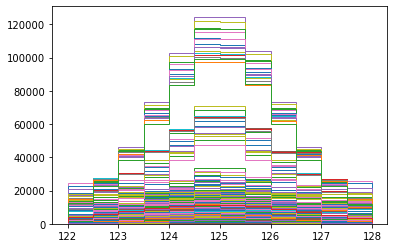

In [67]:
EDGES = [122, 122.5, 123, 123.5, 124,124.5, 125, 125.5, 126, 126.5, 127, 127.5, 128]
great_ttHc, great_x1, great_x2, great_max_sig = findx1x2(df_great,ttHcut,x_1,x_2,varT= "prediction_ttH",var = "prediction_great")

In [68]:
#4 categories
#df_small_med (mx<350, medium purity)
#df_small_high (mx<350, high purity)
#df_great_med (mx>350, medium purity)
#df_great_high (mx>350, high purity)

In [69]:
df_small_med = df_small.loc[(df_small.prediction_small >= small_x1) & (df_small.prediction_small <= small_x2) & (df_small.prediction_ttH >= small_ttHc)]
df_small_high = df_small.loc[(df_small.prediction_small > small_x2) & (df_small.prediction_ttH >= small_ttHc)]


In [70]:
df_great_med = df_great.loc[(df_great.prediction_great >= great_x1) & (df_great.prediction_great <= great_x2) & (df_great.prediction_ttH >= great_ttHc)]
df_great_high = df_great.loc[(df_great.prediction_great > great_x2) & (df_great.prediction_ttH >= great_ttHc)]


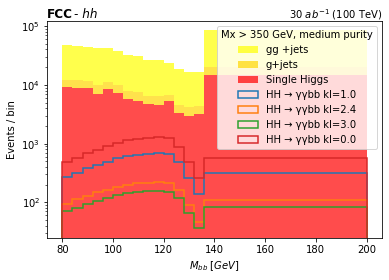

In [74]:
EDGES = np.arange(start = 80, stop = 138, step = 4)
EDGES = np.append(EDGES,200)
drawMbb(df_great_med,EDGES,"Mx > 350 GeV, medium purity")

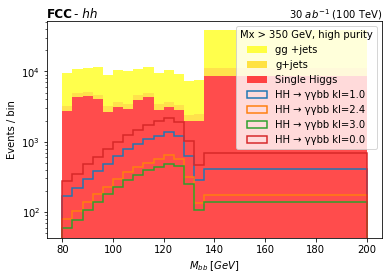

In [75]:
EDGES = np.arange(start = 80, stop = 138, step = 4)
EDGES = np.append(EDGES,200)
drawMbb(df_great_high,EDGES,"Mx > 350 GeV, high purity")

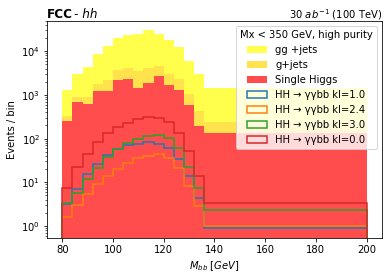

In [76]:
EDGES = np.arange(start = 80, stop = 138, step = 4)
EDGES = np.append(EDGES,200)
drawMbb(df_small_high,EDGES,"Mx < 350 GeV, high purity")

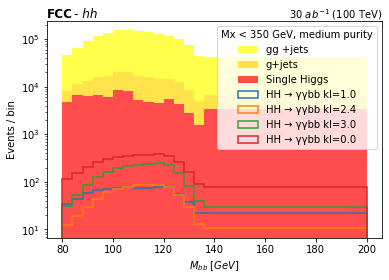

In [77]:
EDGES = np.arange(start = 80, stop = 138, step = 4)
EDGES = np.append(EDGES,200)
drawMbb(df_small_med,EDGES,"Mx < 350 GeV, medium purity")

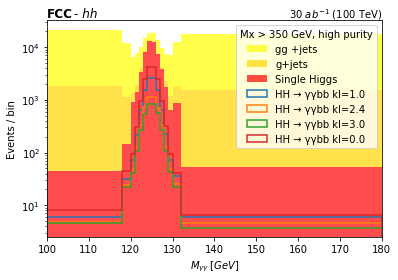

In [78]:
EDGES = [100.,118, 120, 121, 122, 123, 124, 125, 126, 127, 128,129, 130, 132, 180]
drawMgg(df_great_high,EDGES,"Mx > 350 GeV, high purity")

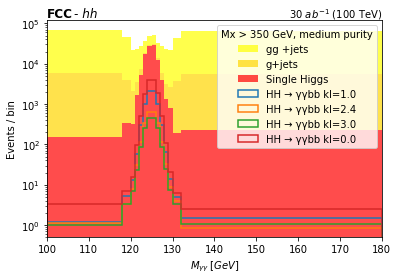

In [80]:
EDGES = [100.,118, 120, 121, 122, 123, 124, 125, 126, 127, 128,129, 130, 132, 180]
drawMgg(df_great_med,EDGES,"Mx > 350 GeV, medium purity")

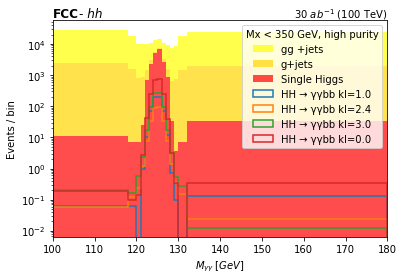

In [81]:
EDGES = [100.,118, 120, 121, 122, 123, 124, 125, 126, 127, 128,129, 130, 132, 180]
drawMgg(df_small_high,EDGES,"Mx < 350 GeV, high purity")

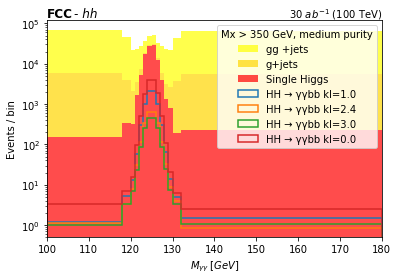

In [82]:
EDGES = [100.,118, 120, 121, 122, 123, 124, 125, 126, 127, 128,129, 130, 132, 180]
drawMgg(df_great_med,EDGES,"Mx > 350 GeV, medium purity")

In [83]:
m_1 = np.arange(start = 112, stop = 122, step = 2)
m_2 = np.arange(start = 126, stop = 136, step = 2)

In [88]:
m_1

array([112, 114, 116, 118])

In [89]:
EDGES = [122, 123, 124, 125, 126, 127, 128]

[(112, 126), (112, 128), (112, 130), (112, 132), (114, 126), (114, 128), (114, 130), (114, 132), (116, 126), (116, 128), (116, 130), (116, 132), (118, 126), (118, 128), (118, 130), (118, 132)]
----------------
----------------
(112, 126)
mgp8_pp_tth01j_5f_haa
[  41.  317. 1040. 1047.  372.   62.]
[ 11.  91. 297. 314.  89.   9.]
bkg med :  [ 151.25631714 1169.46801758 3836.70532227 3862.45898438 1372.4765625
  228.74609375]
bkg high :  [  40.58095551  335.71520996 1095.68554688 1158.41162109  328.33959961
   33.20288086]
mgp8_pp_h012j_5f_haa
[  2.  30.  98. 103.  34.   3.]
[ 0. 10. 31. 21.  7.  3.]
bkg med :  [  452.15100098  5682.88745117 18580.53735352 19358.55859375
  6487.75         680.09375   ]
bkg high :  [  40.58095551 1840.1887207  5759.55126953 4317.8046875  1381.47045898
  484.54467773]
mgp8_pp_jjaa_5f
[1546. 1470. 1431. 1458. 1492. 1445.]
[585. 590. 563. 592. 572. 569.]
bkg med :  [50552.21350098 53320.07495117 64953.88110352 66631.15234375
 54884.5        47552.28125   ]
bk

mgp8_pp_vbf_h01j_5f_haa
[ 7. 31. 71. 80. 32.  4.]
[ 2.  9. 40. 41. 10.  0.]
bkg med :  [45752.07680511 48625.71112061 61553.03381348 63447.04370117
 50382.78637695 42044.29931641]
bkg high :  [24087.69213772 27236.6665802  32085.26171875 31666.28662109
 25977.30212402 24605.68444824]
add a+jj
bkg med :  [49808.25453949 52410.19158936 65276.36193848 67219.97729492
 54295.7824707  45753.03759766]
bkg high :  [26245.54370022 29461.58650208 34178.9609375  33873.71044922
 28085.5814209  26772.28405762]
sig med :  [  7.75736141  64.13461304 199.02189636 197.63092041  65.3230896
   9.38354492]
sig high :  [  4.0230279   35.43886185 119.78929138 121.71659851  37.88046265
   4.62860107]
sono dentro
7.75736141204834
49808.254539489746
sono dentro
64.13461303710938
52410.19158935547
sono dentro
199.0218963623047
65276.36193847656
sono dentro
197.63092041015625
67219.97729492188
sono dentro
65.32308959960938
54295.782470703125
sono dentro
9.383544921875
45753.03759765625
sono dentro
:::::::
Exact 

bkg med :  [ 154.94549561 1077.23779297 3545.28295898 3522.97900391 1232.27734375
  199.23046875]
bkg high :  [  36.89177704  427.94470215 1387.13378906 1497.81884766  468.52954102
   62.71655273]
mgp8_pp_h012j_5f_haa
[ 2. 31. 93. 98. 33.  4.]
[ 0.  9. 36. 26.  8.  2.]
bkg med :  [  455.84017944  5741.10449219 17536.87866211 18266.82470703
  6197.1015625    801.02734375]
bkg high :  [  36.89177704 1781.9708252  6803.23632812 5409.44824219 1672.10766602
  363.61108398]
mgp8_pp_jjaa_5f
[1488. 1399. 1368. 1384. 1446. 1372.]
[643. 661. 626. 666. 618. 642.]
bkg med :  [48676.34017944 51077.44824219 61868.62866211 63117.07470703
 53100.8203125  45305.27734375]
bkg high :  [20874.11052704 23202.5020752  27089.54882812 26992.01074219
 21699.18579102 21168.42358398]
mgp8_pp_vh012j_5f_haa
[ 16. 135. 466. 500. 135.  21.]
[  4.  42. 111. 100.  32.   3.]
bkg med :  [48730.19387054 51531.8380127  63437.11401367 64800.05810547
 53555.21582031 45375.95751953]
bkg high :  [20887.57395077 23343.86799622

bkg med :  [ 158.63467407 1121.50842285 3681.77148438 3711.16552734 1276.55078125
  202.91992188]
bkg high :  [  33.20259857  383.67456055 1250.63269043 1309.66918945  424.2590332
   59.02734375]
mgp8_pp_h012j_5f_haa
[ 2. 32. 97. 99. 35.  4.]
[ 0.  8. 32. 25.  6.  2.]
bkg med :  [  459.52935791  5935.8223877  18275.15625    18605.47021484
  6542.2734375    804.71679688]
bkg high :  [  33.20259857 1587.2532959  6064.94616699 5070.85131836 1326.94262695
  359.921875  ]
mgp8_pp_jjaa_5f
[1591. 1500. 1458. 1469. 1533. 1474.]
[540. 560. 536. 581. 531. 540.]
bkg med :  [52017.87310791 54545.1973877  65523.46875    66241.03271484
 56268.9609375  48617.59179688]
bkg high :  [17532.57759857 19734.7532959  23434.69616699 23898.88256836
 18534.66137695 17859.296875  ]
mgp8_pp_vh012j_5f_haa
[ 16. 142. 483. 513. 138.  23.]
[ 4. 35. 94. 87. 29.  1.]
bkg med :  [52071.72679901 55023.14807129 67149.1763916  67967.77368164
 56733.44458008 48695.00341797]
bkg high :  [17546.0410223  19852.55818939 23751.

bkg med :  [  459.52935791  5965.33605957 18888.81054688 19053.97802734
  6744.375        958.85546875]
bkg high :  [  33.20259857 1557.73986816 5451.27893066 4622.38842773 1124.84643555
  205.78540039]
mgp8_pp_jjaa_5f
[1675. 1589. 1529. 1553. 1602. 1557.]
[456. 471. 465. 497. 462. 457.]
bkg med :  [54739.99810791 57458.86730957 68450.74804688 69429.41552734
 58709.25       51464.04296875]
bkg high :  [14813.65572357 16821.08361816 20520.18518066 20728.29467773
 16096.53393555 15015.44165039]
mgp8_pp_vh012j_5f_haa
[ 16. 145. 501. 525. 142.  23.]
[ 4. 32. 76. 75. 25.  1.]
bkg med :  [54793.85179901 57946.91552734 70137.04345703 71196.5480957
 59187.18847656 51541.45458984]
bkg high :  [14827.1191473  16928.79093933 20775.98995972 20980.73306274
 16180.68005371 15018.80749512]
mgp8_pp_vbf_h01j_5f_haa
[ 7. 34. 84. 99. 39.  4.]
[ 2.  6. 27. 22.  3.  0.]
bkg med :  [54966.51934052 58785.58666992 72209.05053711 73638.57006836
 60149.20117188 51640.12255859]
bkg high :  [14876.45272732 17076.

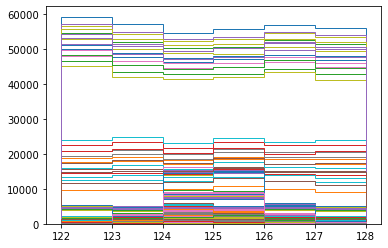

In [90]:
m_1 = np.arange(start = 112, stop = 120, step = 2)
m_2 = np.arange(start = 126, stop = 134, step = 2)
m1_small_med,m2_small_med,max_sig_small_med = findm1m2(df_small_med,m_1,m_2)

[(112, 126), (112, 128), (112, 130), (112, 132), (114, 126), (114, 128), (114, 130), (114, 132), (116, 126), (116, 128), (116, 130), (116, 132), (118, 126), (118, 128), (118, 130), (118, 132)]
----------------
----------------
(112, 126)
mgp8_pp_tth01j_5f_haa
[ 31. 162. 336. 354. 157.  47.]
[ 22.  66. 171. 213.  91.  13.]
bkg med :  [ 114.36453247  597.6449585  1239.56958008 1305.97998047  579.20581055
  173.39282227]
bkg high :  [ 81.16191864 243.48576355 630.84576416 785.80059814 335.71801758
  47.9597168 ]
mgp8_pp_h012j_5f_haa
[ 2.  6.  7. 15.  4.  2.]
[ 1.  2.  9. 11.  5.  2.]
bkg med :  [ 415.25921631 1500.32904053 2292.7010498  3562.68920898 1180.99487305
  474.28735352]
bkg high :  [ 231.60926056  544.38047791 1984.87200928 2440.72064209 1087.95458984
  348.85424805]
mgp8_pp_jjaa_5f
[158. 144. 159. 140. 137. 140.]
[102.  95.  84.  92. 103. 110.]
bkg med :  [5536.06390381 6167.39154053 7445.91589355 8100.11108398 5621.1862793
 5011.70922852]
bkg high :  [3537.44519806 3623.345321

add a+jj
bkg med :  [5483.54740143 5946.11485291 7674.85160828 7734.22790527 5837.91992188
 4644.63989258]
bkg high :  [4403.33916283 4809.84962845 5915.10491943 7223.26145172 5321.13948059
 5037.21557617]
sig med :  [  5.7781167   39.32545853 105.0509491  105.86503601  38.050354
   7.05462646]
sig high :  [ 4.50808191 30.07192993 94.25039673 98.3482666  34.7171936   4.62860107]
sono dentro
5.778116703033447
5483.547401428223
sono dentro
39.32545852661133
5946.114852905273
sono dentro
105.05094909667969
7674.851608276367
sono dentro
105.86503601074219
7734.2279052734375
sono dentro
38.05035400390625
5837.919921875
sono dentro
7.05462646484375
4644.639892578125
sono dentro
:::::::
Exact significance
sig_med 3.5858349809035825
sig_high 3.4185007175364945
Naive
sig_med 1.5587187515566252
sig_high 1.4736603957268994
----------------
----------------
(114, 126)
mgp8_pp_tth01j_5f_haa
[ 35. 176. 365. 387. 175.  51.]
[ 18.  52. 142. 180.  73.   9.]
bkg med :  [ 129.12124634  649.29290771 1346.

bkg med :  [5903.64315796 6105.46820068 7527.83569336 7779.9777832  5674.93896484
 5126.05712891]
bkg high :  [3169.86594391 3685.2689209  4625.40405273 5742.58947754 4372.44799805
 3799.62353516]
mgp8_pp_vh012j_5f_haa
[ 7. 34. 79. 88. 38.  6.]
[ 2.  9. 20. 20. 11.  2.]
bkg med :  [5927.20415115 6219.90724945 7793.73794556 8076.17214966 5802.84106445
 5146.25219727]
bkg high :  [3176.5976553  3715.56162262 4692.72113037 5809.90661621 4409.47245789
 3806.35525513]
mgp8_pp_vbf_h01j_5f_haa
[ 0.  3. 11. 13.  8.  0.]
[1. 2. 5. 3. 2. 0.]
bkg med :  [5927.20415115 6293.90761566 8065.07263184 8396.8404541  6000.17553711
 5146.25219727]
bkg high :  [3201.2644453  3764.89519882 4816.05509949 5883.90699768 4458.80601501
 3806.35525513]
add a+jj
bkg med :  [6420.17583084 6711.03725433 8520.12341309 8808.13635254 6405.63745117
 5551.71411133]
bkg high :  [3466.71073437 4044.92644882 5069.8334198  6149.35328674 4753.42222595
 4130.14138794]
sig med :  [  6.76773882  44.59317398 119.6608429  121.2799

sig med :  [  7.57271862  49.12661362 133.25949097 136.57699585  47.81829834
   8.81030273]
sig high :  [ 2.71348    20.27129364 66.0413208  67.63629913 24.94924927  2.8729248 ]
sono dentro
7.572718620300293
7007.545032501221
sono dentro
49.12661361694336
7193.0195388793945
sono dentro
133.25949096679688
9272.774505615234
sono dentro
136.57699584960938
9722.260498046875
sono dentro
47.81829833984375
7669.687255859375
sono dentro
8.810302734375
6269.6153564453125
sono dentro
:::::::
Exact significance
sig_med 4.08820967757512
sig_high 2.7962049362977672
Naive
sig_med 1.7648746677641247
sig_high 1.219180156005483
----------------
----------------
(118, 126)
mgp8_pp_tth01j_5f_haa
[ 43. 197. 416. 460. 199.  54.]
[ 10.  31.  91. 107.  49.   6.]
bkg med :  [ 158.63467407  726.76477051 1534.70922852 1697.03222656  734.10400391
  199.20410156]
bkg high :  [ 36.89177322 114.36453247 335.71520996 394.73898315 180.76904297
  22.13525391]
mgp8_pp_h012j_5f_haa
[ 2.  6. 12. 20.  7.  3.]
[1. 2. 4. 6.

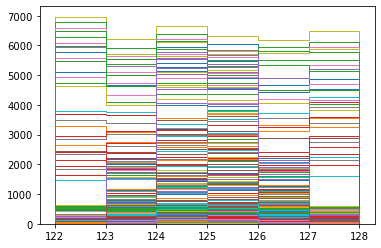

In [91]:
m_1 = np.arange(start = 112, stop = 120, step = 2)
m_2 = np.arange(start = 126, stop = 134, step = 2)
m1_small_high,m2_small_high,max_sig_small_high = findm1m2(df_small_high,m_1,m_2)

[(112, 126), (112, 128), (112, 130), (112, 132), (114, 126), (114, 128), (114, 130), (114, 132), (116, 126), (116, 128), (116, 130), (116, 132), (118, 126), (118, 128), (118, 130), (118, 132)]
----------------
----------------
(112, 126)
mgp8_pp_tth01j_5f_haa
[171. 488. 825. 874. 408. 145.]
[ 30. 103. 170. 193. 108.  42.]
bkg med :  [ 630.84667969 1800.33117676 3043.49145508 3224.25146484 1505.296875
  534.97070312]
bkg high :  [110.675354   379.98468018 627.1585083  712.01733398 398.43457031
 154.94677734]
mgp8_pp_h012j_5f_haa
[ 24.  64. 111. 107.  51.  16.]
[ 2. 20. 16. 31.  3.  1.]
bkg med :  [ 4241.58154297 11428.95617676 19743.13793945 19322.30224609
  9178.20703125  2942.15820312]
bkg high :  [ 411.57000732 3388.93096924 3034.31500244 5375.88305664  849.77636719
  305.39404297]
mgp8_pp_jjaa_5f
[538. 476. 476. 542. 472. 554.]
[ 92.  91. 133.  83.  95.  98.]
bkg med :  [21678.30029297 26854.33117676 35168.51293945 36886.48974609
 24473.95703125 20895.22070312]
bkg high :  [3393.304

bkg med :  [21062.15966797 27056.36755371 36634.35339355 37403.91748047
 25051.33227539 20282.4440918 ]
bkg high :  [ 4764.81583977  8290.62173462  9969.19024658 11729.45153809
  5689.71203613  4734.84036255]
add a+jj
bkg med :  [22549.82568359 28351.51208496 37906.1619873  38879.91552734
 26337.45629883 21819.18432617]
bkg high :  [ 5114.85490227  8649.41177368 10473.82989502 12076.57336426
  6057.25305176  5099.46438599]
sig med :  [ 180.43598938  601.8604126  1241.90063477 1240.77783203  610.68554688
  184.29052734]
sig high :  [115.06015778 388.54040527 836.25787354 845.12036133 395.68505859
 118.84936523]
sono dentro
180.4359893798828
22549.82568359375
sono dentro
601.8604125976562
28351.512084960938
sono dentro
1241.900634765625
37906.16198730469
sono dentro
1240.77783203125
38879.91552734375
sono dentro
610.685546875
26337.456298828125
sono dentro
184.29052734375
21819.184326171875
sono dentro
:::::::
Exact significance
sig_med 22.360240427657637
sig_high 28.1071225215874
Naive


bkg med :  [ 3907.48474121 11901.62231445 19632.47998047 18199.02539062
  9016.68945312  2619.12304688]
bkg high :  [ 745.66726685 2916.26153564 3144.99401855 6499.10888672 1011.29125977
  628.42382812]
mgp8_pp_jjaa_5f
[525. 461. 454. 518. 453. 539.]
[105. 106. 155. 107. 114. 113.]
bkg med :  [20923.74255371 26840.90356445 34344.91748047 34985.46289062
 23696.72070312 20086.09179688]
bkg high :  [4148.7336731  6351.73809814 8168.5682373  9966.99560547 4706.04907227
 4290.77148438]
mgp8_pp_vh012j_5f_haa
[ 65. 172. 367. 405. 185.  62.]
[ 5. 21. 42. 31. 26. 11.]
bkg med :  [21142.52316284 27419.82885742 35580.18481445 36348.67944336
 24319.42431641 20294.76660156]
bkg high :  [ 4165.56295395  6422.42103577  8309.9342804  10071.33688354
  4793.56103516  4327.79577637]
mgp8_pp_vbf_h01j_5f_haa
[17. 42. 92. 84. 53. 16.]
[ 4. 19. 18. 26. 13.  0.]
bkg med :  [21561.85848999 28455.83349609 37849.52563477 38420.70385742
 25626.77490234 20689.43847656]
bkg high :  [ 4264.23011398  6891.0900116   8

mgp8_pp_tth01j_5f_haa
[170. 473. 820. 884. 418. 146.]
[ 31. 118. 175. 183.  98.  41.]
bkg med :  [ 627.15734863 1744.9934082  3025.04907227 3261.13867188 1542.19140625
  538.66015625]
bkg high :  [114.36453247 435.32202148 645.60516357 675.12524414 361.54248047
 151.25756836]
mgp8_pp_h012j_5f_haa
[ 23.  69. 114. 106.  50.  14.]
[ 3. 15. 13. 32.  4.  3.]
bkg med :  [ 4087.44494629 12125.85473633 20176.03735352 19208.75390625
  9064.65234375  2644.94921875]
bkg high :  [ 565.70651245 2692.03173828 2601.41986084 5489.43823242  963.33154297
  602.59936523]
mgp8_pp_jjaa_5f
[540. 474. 482. 533. 468. 559.]
[ 90.  93. 127.  92.  99.  93.]
bkg med :  [21588.89807129 27486.41723633 35795.84985352 36481.28515625
 24230.77734375 20760.04296875]
bkg high :  [3482.62057495 5706.17626953 6717.50970459 8471.17260742 4171.93701172
 3616.74389648]
mgp8_pp_vh012j_5f_haa
[ 66. 177. 375. 410. 187.  64.]
[ 4. 16. 34. 26. 24.  9.]
bkg med :  [21811.04452515 28082.17175293 37058.0456543  37861.33154297
 24860

add a+jj
bkg med :  [24672.48048401 32187.43151855 42530.46948242 43990.28930664
 28911.49780273 23862.94335938]
bkg high :  [2989.0112133  4813.28787994 5849.15550232 6965.75804138 3482.80914307
 3055.43737793]
sig med :  [ 227.32789612  761.05090332 1586.32861328 1587.18359375  773.43408203
  232.37792969]
sig high :  [ 68.1654892  229.35310364 491.83123779 499.1696167  233.20812988
  70.79382324]
sono dentro
227.32789611816406
24672.48048400879
sono dentro
761.0509033203125
32187.431518554688
sono dentro
1586.32861328125
42530.469482421875
sono dentro
1587.18359375
43990.289306640625
sono dentro
773.43408203125
28911.497802734375
sono dentro
232.3779296875
23862.943359375
sono dentro
:::::::
Exact significance
sig_med 26.868581164404592
sig_high 21.962044787952976
Naive
sig_med 11.668035236364114
sig_high 9.663995118563564
----------------
----------------
(118, 132)
mgp8_pp_tth01j_5f_haa
[179. 488. 838. 909. 441. 152.]
[ 22. 103. 157. 158.  75.  35.]
bkg med :  [ 660.35961914 1800.

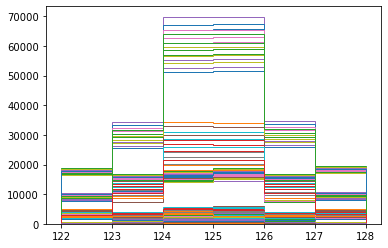

In [92]:
m_1 = np.arange(start = 112, stop = 120, step = 2)
m_2 = np.arange(start = 126, stop = 134, step = 2)
m1_great_med,m2_great_med,max_sig_great_med = findm1m2(df_great_med,m_1,m_2)

[(112, 126), (112, 128), (112, 130), (112, 132), (114, 126), (114, 128), (114, 130), (114, 132), (116, 126), (116, 128), (116, 130), (116, 132), (118, 126), (118, 128), (118, 130), (118, 132)]
----------------
----------------
(112, 126)
mgp8_pp_tth01j_5f_haa
[123. 288. 411. 404. 270. 133.]
[ 46.  88. 137. 113.  85.  47.]
bkg med :  [ 453.76626587 1062.48913574 1516.26489258 1490.38671875  996.02050781
  490.63232422]
bkg high :  [169.70219421 324.64660645 505.41540527 416.88061523 313.58276367
 173.39282227]
mgp8_pp_h012j_5f_haa
[14. 28. 49. 47. 27. 13.]
[ 2.  9. 13. 13.  7.  4.]
bkg med :  [2560.02871704 5275.01257324 8888.18139648 8561.40820312 5058.09667969
 2446.44677734]
bkg high :  [ 470.59684753 1678.67272949 2461.23010254 2372.69506836 1366.71362305
  775.18188477]
mgp8_pp_jjaa_5f
[146. 156. 128. 131. 138. 135.]
[36. 38. 32. 27. 40. 30.]
bkg med :  [ 7291.91152954 10330.99694824 13036.68139648 12807.13867188
  9530.69824219  6821.81787109]
bkg high :  [1637.39176941 2910.29577

bkg med :  [ 6832.76568604 10089.99267578 13567.87158203 12939.29449463
  9376.13110352  6685.19165039]
bkg high :  [2501.46863747 4120.43743134 4737.11139679 4799.24230957 3776.68969727
 2465.06848145]
add a+jj
bkg med :  [ 7220.72564697 10489.62060547 13917.91064453 13286.4163208
  9752.4230957   7043.98168945]
bkg high :  [2644.40119362 4286.70598602 4853.79108429 4913.00500488 3919.62231445
 2587.58215332]
sig med :  [ 295.67132568  702.68249512 1163.48632812 1159.52124023  691.3840332
  288.06640625]
sig high :  [ 346.59869385  841.83435059 1392.21350098 1386.02246094  825.62255859
  344.13720703]
sono dentro
295.67132568359375
7220.725646972656
sono dentro
702.6824951171875
10489.62060546875
sono dentro
1163.486328125
13917.91064453125
sono dentro
1159.521240234375
13286.416320800781
sono dentro
691.384033203125
9752.423095703125
sono dentro
288.06640625
7043.981689453125
sono dentro
:::::::
Exact significance
sig_med 40.220060920191514
sig_high 76.51815412444593
Naive
sig_med 17

bkg med :  [2251.75613403 5087.67285156 8495.05664062 8296.61401367 4518.21972656
 2394.80126953]
bkg high :  [ 778.86991882 1866.01104736 2854.3560791  2637.5078125  1906.59692383
  826.83081055]
mgp8_pp_jjaa_5f
[139. 141. 125. 124. 136. 129.]
[43. 53. 35. 34. 42. 36.]
bkg med :  [ 6756.76785278  9657.50488281 12546.32617188 12315.47338867
  8926.00097656  6575.71142578]
bkg high :  [2172.54862976 3583.80108643 3988.74572754 3739.48632812 3267.86450195
 1993.59838867]
mgp8_pp_vh012j_5f_haa
[ 63. 161. 260. 253. 142.  66.]
[ 6. 17. 24. 20. 11.  4.]
bkg med :  [ 6968.81668091 10199.40588379 13421.44580078 13167.05212402
  9403.96826172  6797.86523438]
bkg high :  [2192.74376488 3641.02062225 4069.52625275 3806.80352783 3304.88893127
 2007.06176758]
mgp8_pp_vbf_h01j_5f_haa
[ 4.  9. 25. 20. 11. 11.]
[ 3.  6.  8. 11.  7.  3.]
bkg med :  [ 7067.4838562  10421.40690613 14038.11584473 13660.38708496
  9675.30249023  7069.19958496]
bkg high :  [2266.74413109 3789.02138519 4266.86049652 4078.138

mgp8_pp_tth01j_5f_haa
[127. 294. 405. 388. 258. 129.]
[ 42.  82. 143. 129.  97.  51.]
bkg med :  [ 468.52297974 1084.62438965 1494.12963867 1431.36328125  951.75292969
  475.87646484]
bkg high :  [154.94548035 302.51171875 527.55029297 475.90795898 357.85327148
 188.1496582 ]
mgp8_pp_h012j_5f_haa
[12. 28. 55. 48. 26. 13.]
[ 4.  9.  7. 12.  8.  4.]
bkg med :  [2273.89077759 5297.14782715 9768.72924805 8652.83203125 4863.38183594
 2431.69091797]
bkg high :  [ 756.73478699 1656.5378418  1580.68115234 2281.27539062 1561.43139648
  789.9387207 ]
mgp8_pp_jjaa_5f
[142. 146. 130. 129. 144. 130.]
[40. 48. 30. 29. 34. 35.]
bkg med :  [ 6876.13296509 10029.03063965 13982.04956055 12833.7421875
  9530.44433594  6645.01123047]
bkg high :  [2053.18009949 3212.2722168  2553.01513672 3221.19824219 2663.40991211
 1924.32836914]
mgp8_pp_vh012j_5f_haa
[ 63. 164. 262. 256. 143.  67.]
[ 6. 14. 22. 17. 10.  3.]
bkg med :  [ 7088.18179321 10581.0291748  14863.90087891 13695.41943359
 10011.77758789  6870.531

sig med :  [ 413.68060303  995.31732178 1659.25268555 1650.84765625  989.20605469
  408.06152344]
sig high :  [228.59234619 549.1973877  896.44677734 894.6809082  527.40380859
 223.97436523]
sono dentro
413.68060302734375
8157.2186279296875
sono dentro
995.3173217773438
11807.458068847656
sono dentro
1659.252685546875
16406.16766357422
sono dentro
1650.84765625
15415.34765625
sono dentro
989.2060546875
11503.686157226562
sono dentro
408.0615234375
7956.81591796875
sono dentro
:::::::
Exact significance
sig_med 53.022841875605074
sig_high 65.04187595802613
Naive
sig_med 22.914537483130008
sig_high 28.398932558599068
----------------
----------------
(118, 132)
mgp8_pp_tth01j_5f_haa
[135. 309. 425. 406. 267. 132.]
[ 34.  67. 123. 111.  88.  48.]
bkg med :  [ 498.03582764 1139.96362305 1567.91381836 1497.75146484  984.95361328
  486.94335938]
bkg high :  [125.43206787 247.17494202 453.76531982 409.5010376  324.65039062
 177.08203125]
mgp8_pp_h012j_5f_haa
[12. 28. 56. 50. 28. 14.]
[ 4.  9.

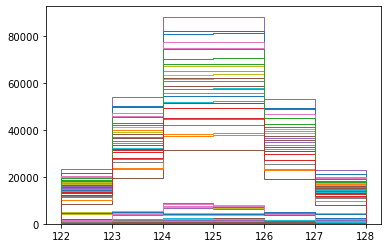

In [93]:
m_1 = np.arange(start = 112, stop = 120, step = 2)
m_2 = np.arange(start = 126, stop = 134, step = 2)
m1_great_high,m2_great_high,max_sig_great_high = findm1m2(df_great_high,m_1,m_2)

In [123]:
#8 categories 
#df_small_med_c
#df_small_med_sb
#df_small_high_c
#df_small_high_sb
#df_great_med_c
#df_great_med_sb
#df_great_high_c
#df_great_high_sb

In [95]:
df_small_med_c = df_small_med.loc[(df_small_med.hbb_m > m1_small_med) & (df_small_med.hbb_m <= m2_small_med)]
df_small_med_sb = df_small_med.loc[(df_small_med.hbb_m <= m1_small_med) | (df_small_med.hbb_m > m2_small_med)]

In [96]:
df_great_med_c = df_great_med.loc[(df_great_med.hbb_m > m1_great_med) & (df_great_med.hbb_m <= m2_great_med)]
df_great_med_sb = df_great_med.loc[(df_great_med.hbb_m <= m1_great_med) | (df_great_med.hbb_m > m2_great_med)]

In [97]:
df_small_high_c = df_small_high.loc[(df_small_high.hbb_m > m1_small_high) & (df_small_high.hbb_m <= m2_small_high)]
df_small_high_sb = df_small_high.loc[(df_small_high.hbb_m <= m1_small_high) | (df_small_high.hbb_m > m2_small_high)]

In [98]:
df_great_high_c = df_great_high.loc[(df_great_high.hbb_m > m1_great_high) & (df_great_high.hbb_m <= m2_great_high)]
df_great_high_sb = df_great_high.loc[(df_great_high.hbb_m <= m1_great_high) | (df_great_high.hbb_m > m2_great_high)]

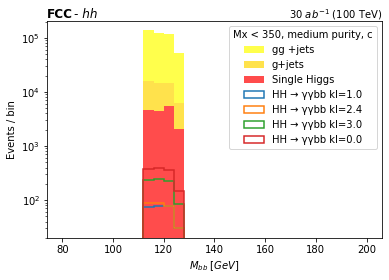

In [101]:
EDGES = np.arange(start = 80, stop = 138, step = 4)
EDGES = np.append(EDGES,200)
drawMbb(df_small_med_c,EDGES, "Mx < 350, medium purity, c")

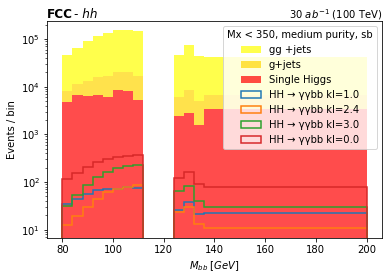

In [102]:
EDGES = np.arange(start = 80, stop = 138, step = 4)
EDGES = np.append(EDGES,200)
drawMbb(df_small_med_sb,EDGES, "Mx < 350, medium purity, sb")

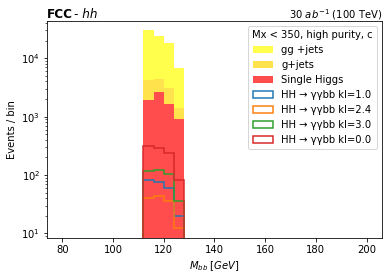

In [103]:
EDGES = np.arange(start = 80, stop = 138, step = 4)
EDGES = np.append(EDGES,200)
drawMbb(df_small_high_c,EDGES, "Mx < 350, high purity, c")

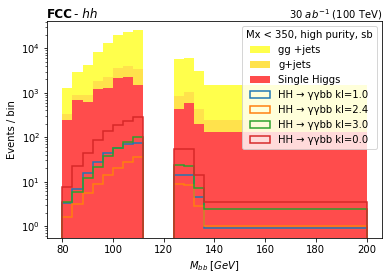

In [104]:
EDGES = np.arange(start = 80, stop = 138, step = 4)
EDGES = np.append(EDGES,200)
drawMbb(df_small_high_sb,EDGES, "Mx < 350, high purity, sb")

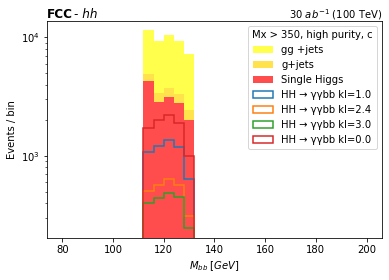

In [105]:
EDGES = np.arange(start = 80, stop = 138, step = 4)
EDGES = np.append(EDGES,200)
drawMbb(df_great_high_c,EDGES, "Mx > 350, high purity, c")

In [48]:
####################################################

In [49]:
##input to combine: these histograms with this binning

In [50]:
####################################################

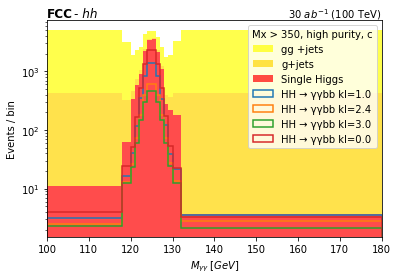

In [109]:
EDGES = [100.,118, 120, 121, 122, 123, 124, 125, 126, 127, 128,129, 130, 132, 180]
drawMgg(df_great_high_c,EDGES,"Mx > 350, high purity, c")

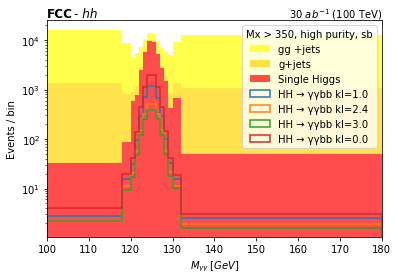

In [110]:
EDGES = [100.,118, 120, 121, 122, 123, 124, 125, 126, 127, 128,129, 130, 132, 180]
drawMgg(df_great_high_sb,EDGES,"Mx > 350, high purity, sb")

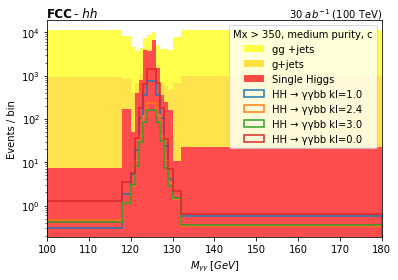

In [111]:
EDGES = [100.,118, 120, 121, 122, 123, 124, 125, 126, 127, 128,129, 130, 132, 180]
drawMgg(df_great_med_c,EDGES,"Mx > 350, medium purity, c")

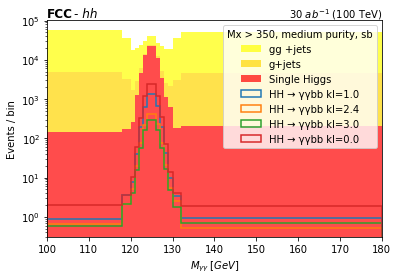

In [113]:
EDGES = [100.,118, 120, 121, 122, 123, 124, 125, 126, 127, 128,129, 130, 132, 180]
drawMgg(df_great_med_sb,EDGES,"Mx > 350, medium purity, sb")

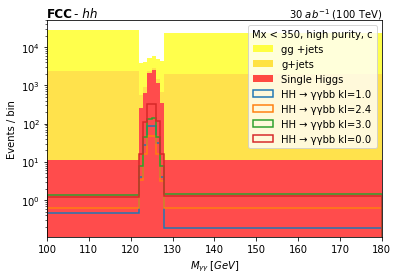

In [117]:
EDGES = [100., 122, 123, 124, 125, 126, 127, 128, 180]
drawMgg(df_small_high_c,EDGES,"Mx < 350, high purity, c")

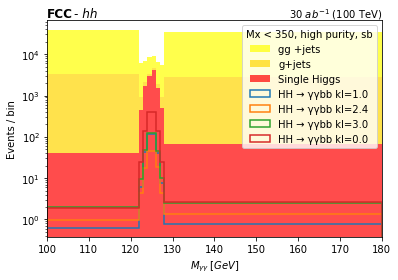

In [118]:
EDGES = [100., 122, 123, 124, 125, 126, 127, 128, 180]
drawMgg(df_small_high_sb,EDGES,"Mx < 350, high purity, sb")

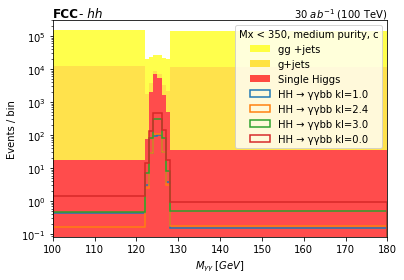

In [119]:
EDGES = [100., 122, 123, 124, 125, 126, 127, 128, 180]
drawMgg(df_small_med_c,EDGES,"Mx < 350, medium purity, c")

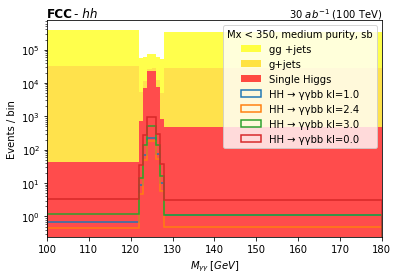

In [122]:
EDGES = [100., 122, 123, 124, 125, 126, 127, 128, 180]
drawMgg(df_small_med_sb,EDGES,"Mx < 350, medium purity, sb")

In [55]:
####################################################

In [56]:
##### SAVE PARQUET (INPUT TO COMBINE) ##########

In [57]:
####################################################

In [58]:
import ROOT

Welcome to JupyROOT 6.28/00


In [124]:
df_dict={"great350_high_purity_sb": df_great_high_sb,
         "great350_high_purity_c" : df_great_high_c,
         "great350_medium_purity_sb": df_great_med_sb,
         "great350_medium_purity_c" : df_great_med_c,
         
         "small350_high_purity_sb": df_small_high_sb,
         "small350_high_purity_c" : df_small_high_c,
         "small350_medium_purity_sb": df_small_med_sb,
         "small350_medium_purity_c" : df_small_med_c,
}
edges_dict ={
         "great350_high_purity_sb": [100.,118, 120, 121, 122, 123, 124, 125, 126, 127, 128,129, 130, 132, 180],
         "great350_high_purity_c" : [100.,118, 120, 121, 122, 123, 124, 125, 126, 127, 128,129, 130, 132, 180],
         "great350_medium_purity_sb": [100.,118, 120, 121, 122, 123, 124, 125, 126, 127, 128,129, 130, 132, 180],
         "great350_medium_purity_c" : [100.,118, 120, 121, 122, 123, 124, 125, 126, 127, 128,129, 130, 132, 180],
        
         "small350_high_purity_sb": [100., 122, 123, 124, 125, 126, 127, 128, 180],
         "small350_high_purity_c": [100., 122, 123, 124, 125, 126, 127, 128, 180],
         "small350_medium_purity_sb": [100., 122, 123, 124, 125, 126, 127, 128, 180],
         "small350_medium_purity_c": [100., 122, 123, 124, 125, 126, 127, 128, 180],
         
}

In [100]:
#!mkdir InputParquets
for kdf in df_dict:
    df_dict[kdf].to_parquet("./InputParquets/"+kdf+".parquet")
    print("saved")

saved
saved
saved
saved
saved
saved
saved
saved


In [61]:
#try to run with LCG101
#from root_numpy import fill_hist
#for kdf in df_dict:
#    out_file = ROOT.TFile(kdf+".root","RECREATE")
#    for i in df_dict[kdf].process.unique():
#        histo = ROOT.TH1D("mgg_"+str(i) ,"mgg_"+str(i), len(np.array(edges_dict[kdf]))-1,np.array(edges_dict[kdf]))
#        histo.Sumw2()
#        fill_hist(histo, (df_dict[kdf].loc[df_dict[kdf].process == str(i),:]['haa_m']).to_numpy(),
#                  weights=(df_dict[kdf].loc[df_dict[kdf].process == str(i),:]['weight']).to_numpy())
#        histo.Write()
#        for ibin in range(1,histo.GetNbinsX()+1):
#            if histo.GetBinContent(ibin) < 0:
#                print("sono entrato")
#                print("process ", str(i))
#                histo.SetBinContent(ibin,1e-3)

#    data_obs = ROOT.TH1D( "data_obs" ,"data_obs",1,0.,1.)
#    data_obs.Fill(1)
#    data_obs.Write()
#    out_file.Close()